In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!cp -R /content/drive/MyDrive/A3dataset.csv ./

Mounted at /content/drive


>[1 Introduction](#scrollTo=jaKMsn1_25bE)

>[2 Problem Analysis](#scrollTo=f0_hVe6T2sKp)

>>[2.1 Background and Investigation](#scrollTo=W3BBPMEZh8S0)

>>[2.2 Designed fraud detection analytics lifecycle](#scrollTo=oBbqyJvciPg6)

>[3 Data Preparation](#scrollTo=hlo_4oJuFj2V)

>>[3.1 Import libraries](#scrollTo=NgGrD98eFncz)

>>[3.2 Load the dataset](#scrollTo=YWB4dteNFyBC)

>>[3.3 Data exploration and optimization](#scrollTo=dlMZYsAtG0pv)

>>[3.4 Creating graph by networkx library](#scrollTo=x1FKnuAZ5F_u)

>>[3.5 Statistical analysis (Corresponding to figures in the academic paper provided)](#scrollTo=c4ccM_DvTXfr)

>[4 Model selection](#scrollTo=Z-DL-gEVOBF5)

>>[4.1 Mode 1: Kmean](#scrollTo=GHpNRReAJTlT)

>>[4.2 Graph algorithm](#scrollTo=Vl-X_h8qTqNh)

>>[4.3 Model 5: Artificial Neural Networks](#scrollTo=2fstZYp-Sf6_)

>>[4.4 Classification Algorithms](#scrollTo=jHKcQiiEWT20)

>[5 Discussion](#scrollTo=Z45pvHCNTQR3)

>[6 Conclusion](#scrollTo=FX3OyM9E3KaR)

>[Reference](#scrollTo=L7pR7Fgkg-8h)



# 1 Introduction

Mobile money service is becoming popular across the world. It provides financial transaction services through mobile phone. The technology spreads swiftly, especially in developing countries. It helps to break the limitation of weak institutional infrastructure (Aron, 2018). However, transactions over mobile money service increase the likelihood and chances of fraudulent activities for profit by avoiding the security measures (Lopez-Rojas, Axelsson and Elmir, 2016). It seems that financial fraud is a problem and novel techniques are needed for fraud detection.

This project performed research in the domain of fraud detection. It is designed by following Big Data Analytics Lifecycle. Through the project, our team made an effort to have a deep analysis over the providing dataset from different aspects and developed an effective fraud detection system for the financial service provider.

The rest of the report is structured as follows: Part 2 states the background and previous work over the dataset. Part 3 presents the details of data preprocessing and some fundamental analysis that we applied over the synthetic financial transaction dataset. This part also demonstrates a systematic analysis of bank transaction network over its characteristics, the graph structure is very suitable for analyzing the characteristics of this dataset. Especially, we made some analysis about fraud account and normal account on the following aspects: the transaction amount for one trade, transaction frequency and the sum of total transaction amount and so on. The Part 4 is the model implementation and comparison. Based on our findings, suitable clustering, classification and neural network models and algorithms are selected and applied. Combined with the characteristics of data sets, experiments of various graph neural network algorithms are carried out. In Part 5, constructive suggestions are provided for the financial service provider. Based on the analytical results, our team suggests that provider should pay high attention to the frequent transactions conducted by one account and pay attention to transactions that have extremely large transaction amount in one trade. Finally, Part 6 states the onclusion and limitation.

# 2 Problem Analysis

## 2.1 Background and Investigation



The domain of the project is identified as fraud detection. Because legitimate datasets of mobile money transaction are in a shortage and financial transactions are intrinsic private, it is hard for researchers to carry out experiments over fraud detection. To push the progress on fraud detection and stop the fraudsters from fraudulent profit, a team developed PaySim simulator to simulate money transactions based on a sample of real transactions. Dataset generated by PaySim includes data of completely self-sufficient data set with the goal of having similar statistical properties as the original dataset (Lopez-Rojas, Axelsson and Elmir, 2016). This dataset is used to address the problem of fraud detection.

Based on the dataset provided, the main stakeholders of this business domain are customers, bank, merchants, agents and research experts. The dataset covers five of the most important transaction types: CASH_IN, CASH_OUT, DEBIT, PAYMENT and TRANSFER. From the designers of the dataset, definitions of these types are as follows.

*   CASH-IN is the process of increasing the balance of account by paying in cash to a merchant.
*   CASH-OUT is the opposite process of CASH-IN, it means to withdraw cash from a merchant which decreases the balance of the account.
*   DEBIT is similar process than CASH-OUT and in volves sending the money from the mobile money service to a bank account.
*   PAYMENT is the process of paying for goods or ser vices to merchants which decreases the balance of the account and increases the balance of the receiver.
*   TRANSFER is the process of sending money to another user of the service through the mobile money platform.

The dataset contains eleven columns: step, type, amount, nameOrig, oldbalanceOrg, newbalanceOrig, nameDest, oldbalanceDest, newbalanceDest, isFraud, isFlaggedFraud. Explanation, offered by designer, of these columns are as follows.
*   step - maps a unit of time in the real world. In this case 1 step is 1 hour of time
*   type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.
*   amount - amount of the transaction in local currency
*   nameOrig - customer who started the transaction
*   oldbalanceOrg - initial balance before the transaction
*   newbalanceOrig - new balance after the transaction
*   nameDest - customer who is the recipient of the transaction
*   oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants)
*   newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants)
*   isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers’ accounts and try to empty the funds by transferring to another account and then cashing out of the system. A fraudulent transaction is labelled in 1 and non-fraudulent in 0
*   isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction

## 2.2 Designed fraud detection analytics lifecycle

The synthetic transactional dataset generated by PyaSim is used for fraud detection research. Our project carried out a series of research on a small part of the dataset trying to develop a fraud detection system. In this project the dataset is scaled down to 95 steps which means it contains less than 4 days’ transaction simulation. To perform research on fraud detection, an analytics plan was provided to guide our group to complete the task.

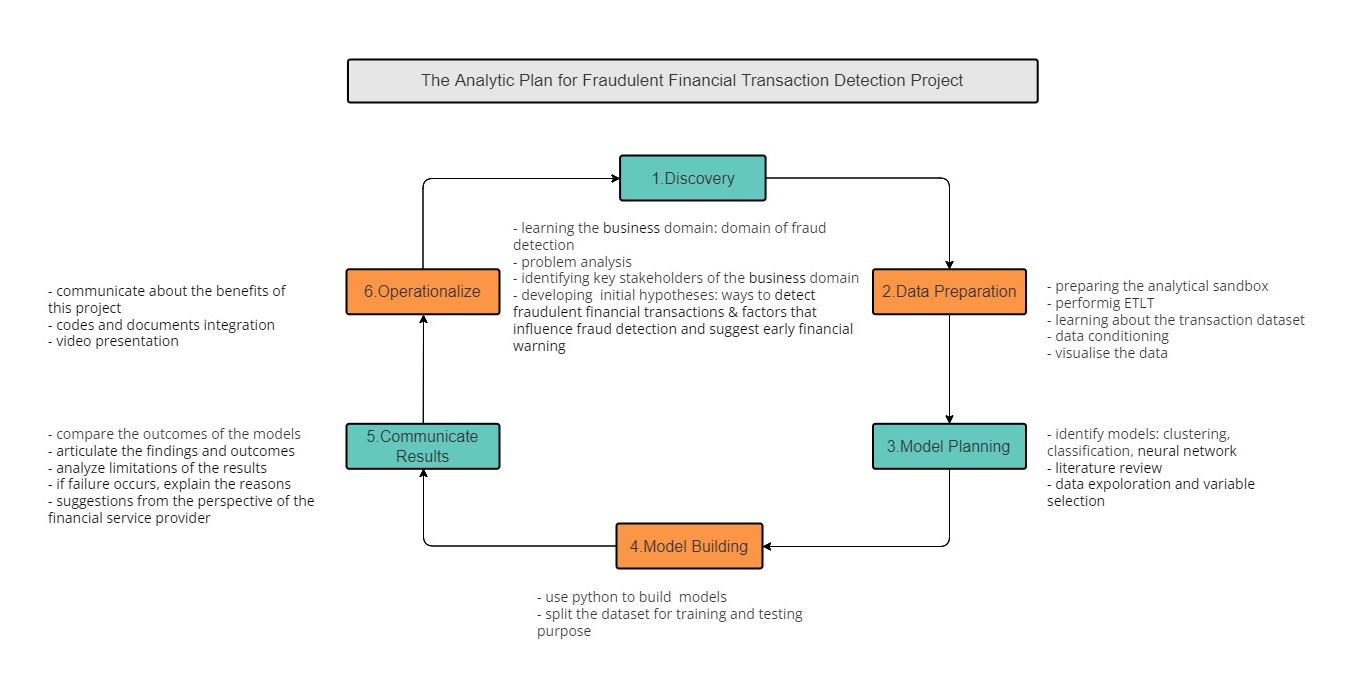

In discovery phase, the domain of the project is identified as fraud detection. Stakeholders of the business domain can be research experts, consumers, agents/fraudsters and financial service companies. Financial service companies like banks are classified as the main stakeholders in this project. The negative influences of fraud transaction on main stakeholders are verified. They may come across great financial loss because of financial fraud. Main hypotheses in this project focus on factors that influence fraud detections and suggest early warnings. After we carried out a series of researches, we come up with the following hypotheses:

* **A fraudulent transaction tends to happen in a "Transfer" or "cash out" transaction. This is because the fraudulent behavior of agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.**

* **A bank account having transactions with a large number of accounts tends to be fraudulent. This is because agents usually tend to transfer or cash out money from many bank accounts to get more money.**

* **If a single transaction has very large transaction amounts, it tends to be fraudulent.**

* **If a bank account has a very large total inflow or outflow, it is likely to be a fraudulent account. So the associated transactions should be monitored because some of them have a high chance to be fraudulent transactions.**

*   **Fraud transactions only occur in customer-to-customer transactions**

In data preparation phase, distracting data and outliers are discovered and removed. Necessary labels for data labeling are added. As the project is designed to detect fraud transactions, we split the fraudulent transactions and valid transactions into different variables for further analysis. We also analyzed the dataset over transaction types, transaction time and transactioin frequency as well as the total amount of transactions within one acount. Analysis results are clearly demonstrated with visualized figures.

In the model planning phase, we followed **the steps in the following graph**. The project uses the K-means algorithm to cluster the dataset. The classification models used include **Artificial Neural Network, Random Forest and Gradient Boosting Trees.** Based on the special structure of the data set, we also tried the **Graph Convolutional Network (GCN) algorithm**.To compare the performance of all algorithms to find out a better model for further research. All algorithms are tested with the test dataset.

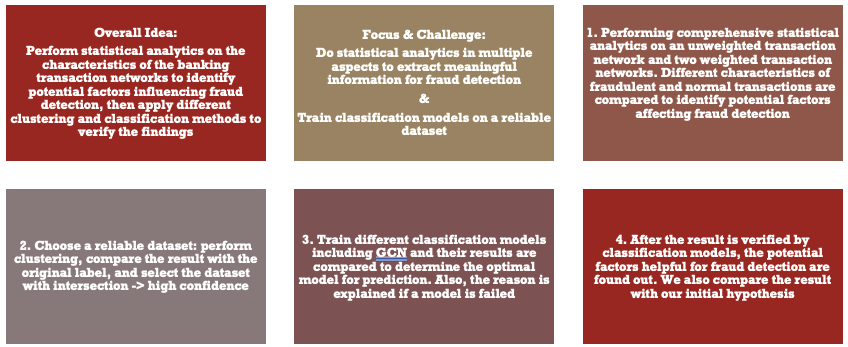

In the model building phase, data is split to training and test sets. The different classification models above are explored. Confusion matrix is expected to provide information regarding to prediction precision. Finally, we compared the algorithm results and find out the most accurate one.

The project results are expected to successfully detect the fraud transactions. Constructive recommendations will be given over our findings. Hopefully, the financial service provider can benefit from our project by preventing fraud, improving the customer experience, reducing losses and improving business efficiency.

# 3 Data Preparation

## 3.1 Import libraries

Before we preprocessed and analyzed the data, we imported the necessary libraries first. The following code cell imported all libraries we need for the whole project.

In [ ]:
# Import necessary libraries
import os
import pandas as pd
import re
import numpy as np
import seaborn as sns
import string
import csv
from random import seed,sample
import collections
from collections import Counter


#  import matplotlib.pylab as plt
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline


import sklearn
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegressionCV
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, label_binarize, LabelBinarizer
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV

from sklearn import metrics
from sklearn.metrics import roc_curve,auc, precision_score, confusion_matrix,accuracy_score,classification_report, recall_score,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from tqdm import tqdm
import networkx as nx
from networkx.algorithms import community
from networkx.algorithms.community import greedy_modularity_communities

import warnings
warnings.filterwarnings("ignore")

# install StellarGraph if running on Google Colab
import sys
if 'google.colab' in sys.modules:
    %pip install -q stellargraph[demos]==1.2.1

# verify that we're using the correct version of StellarGraph for this notebook
import stellargraph as sg
from stellargraph import StellarGraph
from stellargraph.data import BiasedRandomWalk

from stellargraph.mapper import FullBatchNodeGenerator
from stellargraph.layer import GCN
from gensim.models import Word2Vec

try:
    sg.utils.validate_notebook_version("1.2.1")
except AttributeError:
    raise ValueError( f"This notebook requires StellarGraph version 1.2.1, but a different version {sg.__version__} is installed. Please see <https://github.com/stellargraph/stellargraph/issues/1172>.") from None


from tensorflow.keras import layers, optimizers, losses, metrics, Model
from tensorflow.keras.callbacks import EarlyStopping

import statistics
from scipy.stats import skew
from scipy.stats import kurtosis



     |████████████████████████████████| 435 kB 36.1 MB/s 
     |████████████████████████████████| 500 kB 60.5 MB/s 
     |████████████████████████████████| 121 kB 55.0 MB/s 
     |████████████████████████████████| 1.6 MB 50.5 MB/s 
     |████████████████████████████████| 83 kB 2.2 MB/s 
     |████████████████████████████████| 41 kB 597 kB/s 


## 3.2 Load the dataset

After we imported all libraries, we used read_csv() function to load the dataset and store it into the variable "df". After that we checked the basic information about the dataset.

In [ ]:
# Initialize Data
df = pd.read_csv('A3dataset.csv')
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


 From the following codes, we found that the dataset contains 1048575 rows and 11 columns.

In [ ]:
df.shape

(1048575, 11)

After running the subsequent code, our group found that there are  7 columns of float64 data, 2 columns of int64 data, 3 columns of objects and 5 column of uint8 data in this dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


Next code gives a description about the summary statistics. It contains the mean value, standard deviation value, the minimum, the maximum and some other characteristics of the numerical data. From the results of the following code, notably, there is a huge difference between the minimum transaction amount and the maximum. The maximum is 10,000,000 and the minimum amount is only 0.1. The mean amount value is 158,667, but the standard deviation amount value is 264,940.9. From this figure, the amount data in this dataset is relatively discrete.

In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03,0.0
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00,0.0
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00,0.0
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00,0.0


As in this assignment, we don't need to consider the "isFlaggedFraud" column, so we drop it directly.

In [ ]:
# # drop the column isFlaggedFraud
df = df.drop(columns = ['isFlaggedFraud'])

## 3.3 Data exploration and optimization

In order to build a better model for finding misinformation, we removed the distractive data and kept effective data as much as possible.

In this part, we explored the dataset to locate the missing values or invalid values, checked for the duplicates and outliers, transfered data where needed. We tried hard to dig deeper into the available data and tried to make full use of them. More details of the data exploration and processes will be discussed later.

### 3.3.1 Duplicates

With the following code, we checked the duplicates of the dataset and didn't find any duplicates.

In [ ]:
# check the duplicates of the dataset, there is no duplicates
df.duplicated().sum()

0

### 3.3.2 Missing values


Here, we checked that there is no null value for all data in each transaction.

In [ ]:
# check the NaN value data for each column
print('The sum of NaN data in each column:\n',df.isna().sum())

The sum of NaN data in each column:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64


### 3.3.3 Detect outliers

With the following code, we checked the outliers of the dataset. We found that there might be some abnormal data in "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest" and "newbalanceDest" columns.

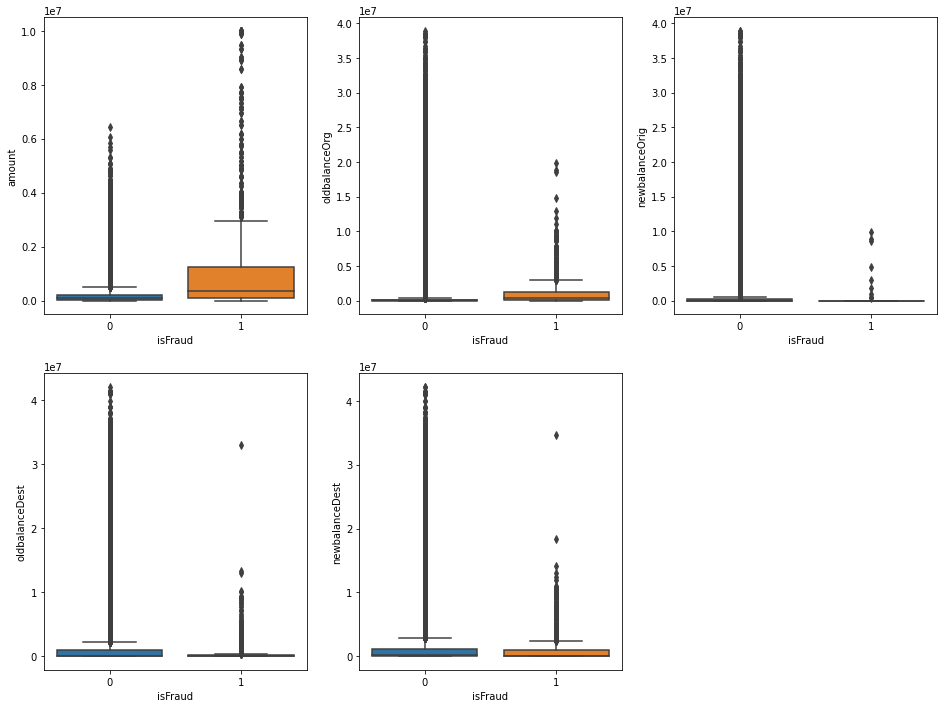

In [ ]:
# plot boxplots to check all outliers

plt.figure(figsize=[16,12])
# Boxplot of fav_number by gender
plt.subplot(231)
sns.boxplot(x='isFraud', y='amount', data=df)

# Boxplot of tweet_count by gender
plt.subplot(232)
sns.boxplot(x='isFraud', y='oldbalanceOrg', data=df)

# Boxplot of daily_tweet_count by gender
plt.subplot(233)
sns.boxplot(x='isFraud', y='newbalanceOrig', data=df)

# Boxplot of daily_tweet_count by gender
plt.subplot(234)
sns.boxplot(x='isFraud', y='oldbalanceDest', data=df)

# Boxplot of daily_tweet_count by gender
plt.subplot(235)
sns.boxplot(x='isFraud', y='newbalanceDest', data=df)

plt.show()

### 3.3.4 Add a new column to mark transferers and transferees

The subsequent two code cells include codes for adding new features. According the transaction types, we added one column to mark the transferer and the transferee for futher analysis.

In [ ]:
# reverse 'cash_in' direction
# define reverse function
def reverse_cash_in_nameOrig(x):
  if x['type'] == 'CASH_IN':
    return x['nameDest']
  else:
    return x['nameOrig']

def reverse_cash_in_nameDest(x):
  if x['type'] == 'CASH_IN':
    return x['nameOrig']
  else:
    return x['nameDest']

In [ ]:
df['nameOrig_new'] = df.apply(reverse_cash_in_nameOrig, axis = 1)
df['nameDest_new'] = df.apply(reverse_cash_in_nameDest, axis = 1)

### 3.3.5 Add features of user transfer type

The following code is to add a new column to mark the transaction flow. If the transaction originated from a customer to a customer, it will be marked as "CC". If the transaction originated from a customer to a merchant, it will be marked as "CM". If the transaction originated from a merchant to a customer, it will be marked as "MC". If the transaction originated from a merchant to a merchant, it will be marked as "MM".

In [ ]:
df["tr_type"] = np.nan # initializing feature column

# filling feature column
df.loc[df.nameOrig.str.contains('C') & df.nameDest.str.contains('C'),"tr_type"] = "CC"
df.loc[df.nameOrig.str.contains('C') & df.nameDest.str.contains('M'),"tr_type"] = "CM"
df.loc[df.nameOrig.str.contains('M') & df.nameDest.str.contains('C'),"tr_type"] = "MC"
df.loc[df.nameOrig.str.contains('M') & df.nameDest.str.contains('M'),"tr_type"] = "MM"


After we transfered and labeled the transaction, we counted the total number of each transaction type. From the result, there are only two types of transactioins:transactions from customers to merchents and transactions from customers to customers.

In [ ]:
df["tr_type"].value_counts()

CC    694702
CM    353873
Name: tr_type, dtype: int64

### 3.3.6 Split to fraud and valid

We stored fraudulent transactions into variable “fraud” and valid transactions into variable “valid”. Our team found that there are no transactions originated in merchants. The fraud happened only in the customers-to-customers transactions.

In [ ]:
fraud = df[df["isFraud"] == 1]
valid = df[df["isFraud"] == 0]

In [ ]:
# seeing the counts of transactions by tr_type (CC,CM,MC,MM)
print("Fraud transactions by type1: \n", fraud.tr_type.value_counts())
print("Valid transactions by type1: \n", valid.tr_type.value_counts())

Fraud transactions by type1: 
 CC    1142
Name: tr_type, dtype: int64
Valid transactions by type1: 
 CC    693560
CM    353873
Name: tr_type, dtype: int64


### 3.3.7 Type analysis

With the following plotting code, we found that fraud occurs in “TRANSFER” and “CASH_OUT”.

In [ ]:
# df = df[(df["type"] == "CASH_OUT") | (df["type"] == "TRANSFER")]

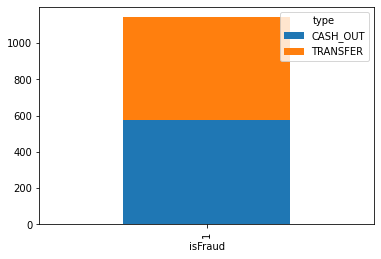

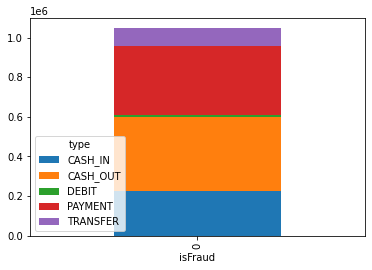

In [ ]:
df_fraud_type_plot = fraud.groupby(["isFraud","type"]).size().reset_index().pivot(columns="type",index="isFraud",values=0)
df_fraud_type_plot.plot(kind="bar",stacked=True)

df_valid_type_plot = valid.groupby(["isFraud","type"]).size().reset_index().pivot(columns="type",index="isFraud",values=0)
df_valid_type_plot.plot(kind="bar",stacked=True)

In the following code, we did a one hot encoding for data in "type" column for further studies. The result of the data conversion is displayed in the subsequent cell.

In [ ]:
df = pd.get_dummies(df, columns=['type'])
# df['type_b']=LabelBinarizer().fit_transform(df['type'])
# dataset = pd.get_dummies(dataset,prefix=['type'])

In [ ]:
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,nameOrig_new,nameDest_new,tr_type,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,C1231006815,M1979787155,CM,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,C1666544295,M2044282225,CM,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,C1305486145,C553264065,CC,0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,C840083671,C38997010,CC,0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,C2048537720,M1230701703,CM,0,0,0,1,0


### 3.3.8 Step analysis

In this part, we analyzed the dataset over the time range. The following codes are applied to create countplots step by step to visualize general distributions of fraudulent transactions and valid transactions. Comparing the following figures, fraudulent transactions almost cover all steps. The fraudulent trades are very frequent.

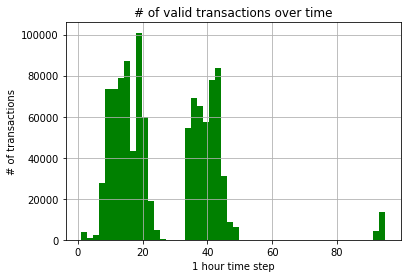

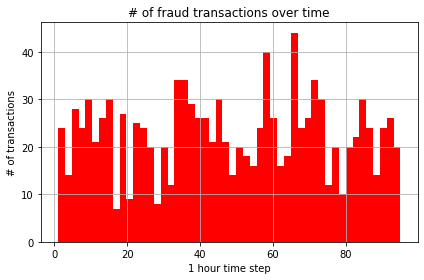

In [ ]:
# Time patterns
bins = 50

valid.hist(column="step",color="green",bins=bins)
plt.xlabel("1 hour time step")
plt.ylabel("# of transactions")
plt.title("# of valid transactions over time")

fraud.hist(column ="step",color="red",bins=bins)
plt.xlabel("1 hour time step")
plt.ylabel("# of transactions")
plt.title("# of fraud transactions over time")

plt.tight_layout()
plt.show()

After we had a general understanding of the transaction distribution, we created two countplots to visualize distributions of different transactions over week days. Comparing the following figures, both fraudulent transactions and valid transactions happened throughout the week.

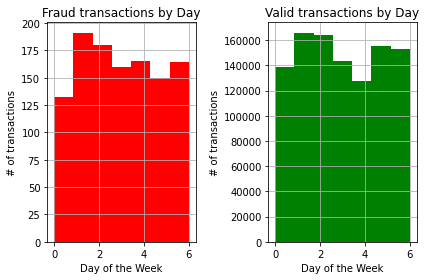

In [ ]:
# getting hours and days of the week
num_days = 7
num_hours = 24
fraud_days = fraud.step % num_days
fraud_hours = fraud.step % num_hours
valid_days = valid.step % num_days
valid_hours = valid.step % num_hours

# plotting scatterplot of the days of the week, identifying the fraudulent transactions (red) from the valid transactions (green)
plt.subplot(1, 2, 1)
fraud_days.hist(bins=num_days,color="red")
plt.title('Fraud transactions by Day')
plt.xlabel('Day of the Week')
plt.ylabel("# of transactions")

plt.subplot(1,2,2)
valid_days.hist(bins=num_days,color="green")
plt.title('Valid transactions by Day')
plt.xlabel('Day of the Week')
plt.ylabel("# of transactions")

plt.tight_layout()
plt.show()


Furthermore, we created two counterplots to visualize transaction distributions over hours of a day. Comparing the following figures, valid transactions rarely happened during the time between 0 and 8 a.m. On the contrary, fraudulent transactions happened during that period.

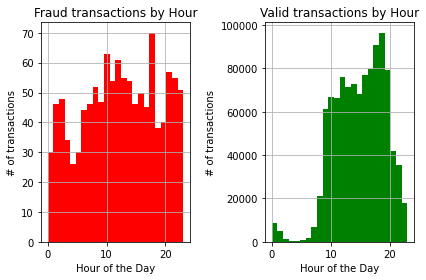

In [ ]:
plt.subplot(1, 2, 1)
fraud_hours.hist(bins=num_hours, color="red")
plt.title('Fraud transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel("# of transactions")


plt.subplot(1, 2, 2)
valid_hours.hist(bins=num_hours, color="green")
plt.title('Valid transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel("# of transactions")

plt.tight_layout()
plt.show()

### 3.3.9 Adding feature HourOfDay
The following code added one more column for the availible dataset for futher analysis. The new column is to label each transaction with the specific transaction time in a day.

In [ ]:
# initializing feature column
df["HourOfDay"] = np.nan
df.HourOfDay = df.step % 24


### 3.3.10 Amount analysis

In the following part, we create a scatter plot to have a visual understanding of the relationship between the transaction amount and time. From the graph, the valid transactions are concentrated distributed in different timestep. However, fraudulent transactions are scattered in the system.

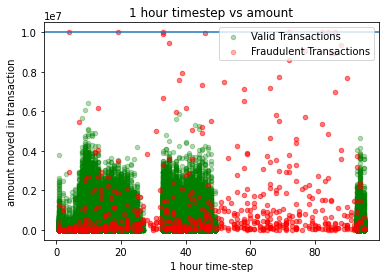

Proportion of transactions where the amount moved is greater than 10 million:  0.0


In [ ]:
# plotting overlayed step vs amount scatter plots

alpha = 0.3
fig,ax = plt.subplots()
valid.plot.scatter(x="step",y="amount",color="green",alpha=alpha,ax=ax,label="Valid Transactions")
fraud.plot.scatter(x="step",y="amount",color="red",alpha=alpha,ax=ax, label="Fraudulent Transactions")

plt.title("1 hour timestep vs amount")
plt.xlabel("1 hour time-step")
plt.ylabel("amount moved in transaction")
plt.legend(loc="upper right")

# plotting a horizontal line to show where valid transactions behave very differently from fraud transactions

plt.axhline(y=10000000)
plt.show()


print("Proportion of transactions where the amount moved is greater than 10 million: ", \
      len(df[df.amount > 10000000])/len(df))

### 3.3.11 Check unique values  of each column

The following code it to check the unique values of each column. From the result, data that are worth mentioning are in columns like "step", "amount", "nameOrig" and "nameDest". There are 95 unique steps, 1009606 unique transaction amount, 1048317 transferers and 449635 transferees. The result shows that the dataset itself has some problems, and the actual transfer situation has not been simulated.

In [ ]:
df.nunique()

step                   95
amount            1009606
nameOrig          1048317
oldbalanceOrg      391033
newbalanceOrig     440792
nameDest           449635
oldbalanceDest     590110
newbalanceDest     437054
isFraud                 2
nameOrig_new       896450
nameDest_new       667352
tr_type                 2
type_CASH_IN            2
type_CASH_OUT           2
type_DEBIT              2
type_PAYMENT            2
type_TRANSFER           2
HourOfDay              24
dtype: int64

### 3.3.12 Heatmap

In this part, we created a heatmap to visualize the correlation between different data. We found that the newbalanceOrig and the oldbalanceOrig, the newbalanceDest and the oldbalanceDest have a strong correlation.

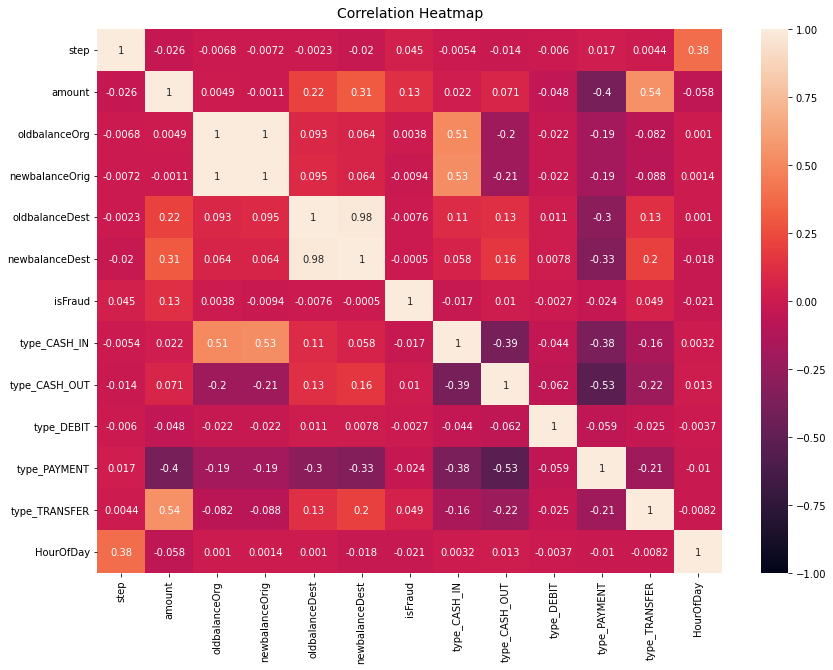

In [ ]:
# Generate heatmap
plt.figure(figsize=(14, 10))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

### 3.3.13 Data balance
We checked the balance of the data and found that the dataset is extremely unbalanced. Among the 1048575 data, 1047433 data is normal, only 1142 data is fraud. This great imbalance will affect the model selection and also the performancy of the models.

In [ ]:
df['isFraud'].value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

### 3.3.14 Data sampling

We generally define the fraud detection problem as a binary classification problem. However in industrial data, the percentage of fraudsters is very low. There may be just a few thousand or a few hundred fraudsters out of a million users, so the data for fraud detection is extreme unbalanced. Therefore, it is impossible for the model to learn well without some adjustments, no matter for graph neural networks or traditional machine learning models. Here we propose common solutions:

1. The most classical solution to solve this problem is to do data sampling. Analysts can sample valid transactions to make it the same amount as the number of fraudulent transactioins.

2. Another solution is to filter the neighbours to keep the balance of labels when GNN aggregates. The final solution is to do data augmentation. Firstly, we need to study the characteristics of fraudulent transactioins. Then we can generate more fraud data based on its characteristics to balance the dataset.

We chose to sample the data to solve the imbalance problem.

In the following part, we extracted all fraud nodes of fraud accounts. Nodes extracted are fraud accounts and those transaction accounts which are under the condition:"fraud = 1". We found that the number of accounts that are related to fraudulent transactions is 2274.

Here we also extracted all transactions that are related to fraud account as the fraud sample. And we counted that there are 8368 transactions that related to fraud account.

In [ ]:
# extract all fraud node of fraud accounts
fraud_nameDest_list = fraud['nameDest'].tolist()
fraud_nameOrig_list = fraud['nameOrig'].tolist()
fraud_node_list = set(fraud_nameDest_list + fraud_nameOrig_list)

# print amount of accounts that are related to fraudulent transactions
print('Account number related to fraudulent transactions: ', len(fraud_node_list))

# extract all transaction related to fraudulent transactions as the fraud sample
fraud_sample = df.loc[(df['nameDest'].isin(fraud_node_list)) | (df['nameOrig'].isin(fraud_node_list))]

# get the number of transactions that related to fraud account
print('All transactions number of accounts related to fraudulent transactions: ', len(fraud_sample))

Account number related to fraudulent transactions:  2274
All transactions number of accounts related to fraudulent transactions:  8368


Furthermore, we counted the total amount of accounts(nodes) that are related to fraudulent transactions. There are 9500 accounts in total.

In [ ]:
fraud_sample_list1 = fraud_sample['nameDest'].tolist()
fraud_sample_list2 = fraud_sample['nameOrig'].tolist()
fraud_sample_list = set(fraud_sample_list1 + fraud_sample_list2)

# total amount of accounts(nodes) that are related to fraudulent transactions
print('Account number of fraud accounts and accounts has transaction with fraud accounts : ', len(fraud_sample_list))

Account number of fraud accounts and accounts has transaction with fraud accounts :  9500


In the following part, we sampled valid transactions to make it the same amount as the number of fraudulent transactioins. There are 9503 normal accounts and 8368 related transactions.

In [ ]:
# sample the valid transactions
valid_sort = valid.sort_values(by=['nameDest'])
valid_sample = valid_sort.iloc[: len(fraud_sample),]

valid_nameDest_list = valid_sample['nameDest'].tolist()
valid_nameOrig_list = valid_sample['nameOrig'].tolist()
valid_node_list = set(valid_nameDest_list + valid_nameOrig_list)

# amount of the valid transaction account nodes
print('Account number of normal accounts: ', len(valid_node_list))

# get the number of valid sample
print('All transactions number of normal accounts: ', len(valid_sample))

Account number of normal accounts:  9503
All transactions number of normal accounts:  8368


After we got the same amount of valid smple and fraud sample, we combined them all together for further study. There are 16736 samples in total.

In [ ]:
# df_sample = pd.concat([valid_sample, fraud_sample])
df_sample_index = valid_sample.index.tolist() + fraud_sample.index.tolist()
df_sample = df.loc[df_sample_index]
# get the number of both valid smple and fraud sample
print('Number of all samples: ', len(df_sample))

Number of all samples:  16736


In [ ]:
df_sample.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,nameOrig_new,nameDest_new,tr_type,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,HourOfDay
417706,18,227701.71,C1862300551,203.00,0.00,C1000015936,10043.00,440852.18,0,C1862300551,C1000015936,CC,0,1,0,0,0,18
524361,20,138249.81,C1698310364,0.00,0.00,C1000015936,241817.38,380067.19,0,C1698310364,C1000015936,CC,0,1,0,0,0,20
443955,19,203107.47,C733503967,0.00,0.00,C1000015936,237744.71,440852.18,0,C733503967,C1000015936,CC,0,0,0,0,1,19
627108,34,4123.86,C270772443,2185481.49,2189605.35,C1000015936,380067.19,192308.94,0,C1000015936,C270772443,CC,1,0,0,0,0,10
786971,39,43634.35,C391469604,0.00,0.00,C1000015936,175030.91,218665.25,0,C391469604,C1000015936,CC,0,1,0,0,0,15


### 3.3.15 Data clean
After doing data pre-processing, we have a clean dataset that can be used for clustering, classification and nerual networks.

In [ ]:
# Eliminate columns shown to be irrelevant for analysis
# df_clean = df.drop(columns=['nameOrig','nameDest', 'type'])
df_clean = df_sample.copy()
df_clean = df_clean.drop(columns=['nameOrig','nameDest','tr_type','nameOrig_new','nameDest_new'])

In [ ]:
df_clean.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,HourOfDay
417706,18,227701.71,203.00,0.00,10043.00,440852.18,0,0,1,0,0,0,18
524361,20,138249.81,0.00,0.00,241817.38,380067.19,0,0,1,0,0,0,20
443955,19,203107.47,0.00,0.00,237744.71,440852.18,0,0,0,0,0,1,19
627108,34,4123.86,2185481.49,2189605.35,380067.19,192308.94,0,1,0,0,0,0,10
786971,39,43634.35,0.00,0.00,175030.91,218665.25,0,0,1,0,0,0,15


### 3.3.16 Shuffle

Here we set a random_state and a seed to ensure the training/testing splits and model results are reproducible.

In [ ]:
# Setting random_state and seed so that the training/testing splits and model results are reproducible
RandomState = 42
seed(21)

# 42 is used often due to Hitchhiker's Guide to the Galaxy, I will use a number that a far smaller group may understand.
# Not that the actual number doesn't matter and is only used to make sure results are reproducible.
# creating training and testing sets
X = df_clean.drop(columns=["isFraud"])
y = df_clean.isFraud
X, y = sklearn.utils.shuffle(X, y)

## 3.4 Creating graph by networkx library

We sort nameDest in ascending order,shows there are several transactions from a different account to the same account. For example, as the table shows, 9 transactions happens between different nameOrig account with the same most namedDest account in different time step.

More interestingly, we generate a new column simply by operating the oldbalance column. For the same nameDest account, we use oldbalance record minus the last oldbalance record, (oldbalance-last oldbalance), the absolute value of the result is the same as the value of the amount column.

For nameOrig, everytime the balance change amount is equal to transaction amount. When the transaction type is CASH_OUT, TRANSFER, DEBIT, the balance of nameOrig will decrease. When the transaction type is CASH_IN, the balance of nameOrig will increase.

For nameDest, everytime the balance change amount is equal to  last transaction amount of the same nameDest. The balance change of nameDest depends on the transaction between that account. When the transaction type is CASH_OUT, TRANSFER, or DEBIT, the balance of nameDest will increase. When the transaction type is CASH_IN, the balance of nameDest will decrease.

If we regard every transaction as a cash flow, we can build a network graph to trace the cash flow between all the accounts. Each account is a node, and each transaction is an edge when the transaction is CASH_OUT, TRANSFER, or DEBIT, cash flow from nameOrg to nameDest, so the edge direction is 'in'. When the transaction is CASH_IN, the cash flow from nameDest to nameOrig so, the edge direction is 'out'. We also set weight on each edge, either transaction amount or transaction number.

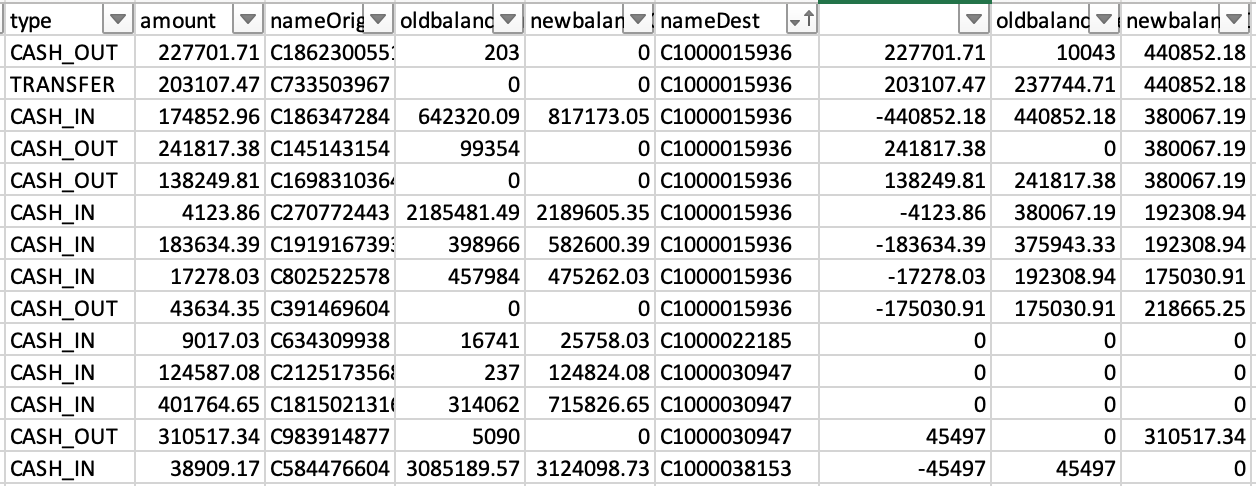

### 3.4.1 Graph dataset

When doing statistical analysis, we were initially about to focus on the weakly largest connected component (WLCC). However, we found that there were only 99 nodes with 98 edges in the WLCC, which was not suitable for statistical analysis. Therefore, we didn't use it for analysis.


Instead, we use **the whole sample dataset, fraud sample and normal sample** to explore and analyze the results.

In [ ]:
df_SNA1 = df_sample.groupby(["nameOrig_new","nameDest_new"])['amount'].sum().reset_index(name="total_transaction_amount")
df_SNA2 = df_sample.groupby(["nameOrig_new","nameDest_new"])['step'].count().reset_index(name="total_transaction")
df_SNA = pd.merge(df_SNA1,df_SNA2,on=["nameOrig_new","nameDest_new"], how="inner")

In [ ]:
fraud_SNA1 = fraud_sample.groupby(["nameOrig_new","nameDest_new"])['amount'].sum().reset_index(name="total_transaction_amount")
fraud_SNA2 = fraud_sample.groupby(["nameOrig_new","nameDest_new"])['step'].count().reset_index(name="total_transaction")
fraud_SNA = pd.merge(fraud_SNA1,fraud_SNA2,on=["nameOrig_new","nameDest_new"], how="inner")

In [ ]:
valid_SNA1 = valid_sample.groupby(["nameOrig_new","nameDest_new"])['amount'].sum().reset_index(name="total_transaction_amount")
valid_SNA2 = valid_sample.groupby(["nameOrig_new","nameDest_new"])['step'].count().reset_index(name="total_transaction")
valid_SNA = pd.merge(valid_SNA1,valid_SNA2,on=["nameOrig_new","nameDest_new"], how="inner")

### 3.4.2 Network G created

The unweighted transcation network is created using a directed graph. An account is a node and a transaction between two accounts is an edge. When creating the network, edge direction is considered. For the types of "CASH-OUT", "DEBIT", "PAYMENT" and "TRANSFER", money flows from "nameOrig" to "nameDest". But for the "CASH IN" type, money flows from "nameDest" to "nameOrig". Therefore, the edge directions are different. The unweighted network G has 18827 nodes and 16574 edges.

In [ ]:
G = nx.from_pandas_edgelist(df_SNA,'nameOrig_new', 'nameDest_new', create_using=nx.DiGraph)
G_nodes = G.number_of_nodes()
G_edges = G.number_of_edges()
print("Nodes = ", G_nodes, " Edges = ",G_edges)

Nodes =  18827  Edges =  16574


In [ ]:
G_fraud = nx.from_pandas_edgelist(fraud_SNA,'nameOrig_new', 'nameDest_new', create_using=nx.DiGraph)
G_normal = nx.from_pandas_edgelist(valid_SNA,'nameOrig_new', 'nameDest_new', create_using=nx.DiGraph)

### 3.4.3 Network GT created

A weighted network G_T is created whose edge-weight is the total amount of money transferred between two accounts. The method used is very similar to that used when creating G.

In [ ]:
G_T = nx.from_pandas_edgelist(df_SNA,'nameOrig_new', 'nameDest_new', edge_attr='total_transaction_amount', create_using=nx.DiGraph)
G_T_nodes = G_T.number_of_nodes()
G_T_edges = G_T.number_of_edges()
print("Nodes = ", G_T_nodes, " Edges = ",G_T_edges)

Nodes =  18827  Edges =  16574


In [ ]:
G_fraud_T= nx.from_pandas_edgelist(fraud_SNA,'nameOrig_new', 'nameDest_new', edge_attr='total_transaction_amount', create_using=nx.DiGraph)
G_normal_T= nx.from_pandas_edgelist(valid_SNA,'nameOrig_new', 'nameDest_new', edge_attr='total_transaction_amount', create_using=nx.DiGraph)

### 3.4.4 Network GN created

A weighted network G_N is created whose edge-weight is the total number of transactions between two accounts. The method used is very similar to that used when creating G and G_T.

In [ ]:
G_N = nx.from_pandas_edgelist(df_SNA,'nameOrig_new', 'nameDest_new', edge_attr='total_transaction', create_using=nx.DiGraph)
G_N_nodes = G_N.number_of_nodes()
G_N_edges = G_N.number_of_edges()
print("Nodes = ", G_N_nodes, " Edges = ",G_N_edges)

Nodes =  18827  Edges =  16574


In [ ]:
G_fraud_N= nx.from_pandas_edgelist(fraud_SNA,'nameOrig_new', 'nameDest_new', edge_attr='total_transaction', create_using=nx.DiGraph)
G_normal_N= nx.from_pandas_edgelist(valid_SNA,'nameOrig_new', 'nameDest_new', edge_attr='total_transaction', create_using=nx.DiGraph)

## 3.5 Statistical analysis (Corresponding to figures in the academic paper provided)

### 3.5.1 Snowball sampling from fraud and normal account

Snowball sampling is to select a random account as a root node, and based on that root node get the more related account that has transaction between with (Simkus, 2022). The distance of snowball sampling is the iteration to get more related account that has transaction between with. A root node just like a snowball, the further it goes, the bigger the size would be.

We build up a snowball function in order to trace the connected nodes from a root node, the trace back distance is depends on the the distance we provide.

In [ ]:
def snowball(data,node,dis):
  #node number record how the how many node in a graph after the distance
  node_number=[]
  if dis==1:
    #any node point to or point out to the node
    dis1=data.loc[(data['nameOrig']==node)|(data['nameDest']==node)]
    #list all the nodes
    dis1_list1=dis1['nameOrig'].tolist()
    dis1_list2=dis1['nameDest'].tolist()
    dis1_list=dis1_list1+dis1_list2
    #remove the unique one
    dis1_list=set(dis1_list)
    #total node number when distance = 1
    node_number.append(len(dis1_list))
    # print('dis',len(dis1_list))
    #build up the graph
    G=nx.from_pandas_edgelist(dis1,'nameOrig_new', 'nameDest_new', create_using=nx.DiGraph)
    return G,node_number

  else:
    # when distance =1
    dis1=data.loc[(data['nameOrig']==node)|(data['nameDest']==node)]
    dis1_list1=dis1['nameOrig'].tolist()
    dis1_list2=dis1['nameDest'].tolist()
    dis1_list=dis1_list1+dis1_list2
    dis1_list=set(dis1_list)
    node_number.append(len(dis1_list))
    # print('dis1',len(dis1_list))

    #start to snowball sampling
    for i in range(1,dis):
      # print(dis)
      dis1=data.loc[(df['nameOrig'].isin(dis1_list))|(df['nameDest'].isin(dis1_list))]
      dis1_list1=dis1['nameOrig'].tolist()
      dis1_list2=dis1['nameDest'].tolist()
      dis1_list=dis1_list1+dis1_list2
      dis1_list=set(dis1_list)
      node_number.append(len(dis1_list))
      # print('dis',len(dis1_list))
      dis-=1

    G=nx.from_pandas_edgelist(dis1,'nameOrig_new', 'nameDest_new', create_using=nx.DiGraph)
    return G,node_number


In order to get snowball sampling, first of all, we have a glimpse of 2 graphs generated based on a random root node from fraud data and normal data respectively.
fraud_nodes and normal_nodes are two lists containing 6 nodes that were randomly selected.



In [ ]:
#randomly select 6 nodes from fraud account and normal account into a list
sample_node_num = 6
fraud_nodes_6 =sample(fraud_node_list,sample_node_num)
normal_list_unique=set(valid_node_list)
normal_nodes_6=sample(normal_list_unique,sample_node_num)

For comparison purpose, we also selected 6 nodes from nameDest but also has transaction as nameOrig, those 6 nodes suppose to connect more nodes when the topological distance increase.

In [ ]:
# not for fig, just for get the node with a lot of connection
nameOrig=df['nameDest'].tolist()
overlap=df.loc[df['nameOrig'].isin(nameOrig)]
overlap = overlap.sample(n=sample_node_num)
overlap=overlap['nameDest'].tolist()

We randomly select a fraud account and a normal account to be root node, based on those root nodes, we do snowball sampling. The distance we set is 3. Those 2 graphs are built from 2 snowball sampling. The red nodes are the root nodes selected. From those two graphs's distance is between 1 or 2, even we choose the distance to be 3.

Text(0.5, 1.0, 'normal')

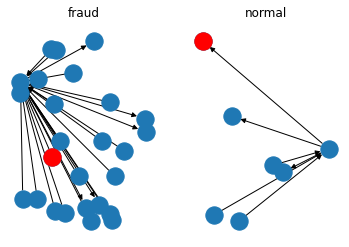

In [ ]:
#fig1
#select a random node from fraud account as a root node, and snowball sampling it
G1,node =snowball(df,fraud_nodes_6[0],3)
pos = nx.random_layout(G1)
plt.subplot(1, 2, 1)
nx.draw(G1, pos=pos)  # Draw the original graph
# the root node is red
nx.draw(G1.subgraph([fraud_nodes_6[0]]), pos=pos, node_color="red")
plt.title('fraud')

#select a random node from fraud account as a root node, and snowball sampling it
G2,node =snowball(df,normal_nodes_6[0],3)

pos = nx.random_layout(G2)
plt.subplot(1, 2, 2)
nx.draw(G2, pos=pos)  # Draw the original graph
# Draw a subgraph, reusing the same node positions
nx.draw(G2.subgraph([normal_nodes_6[0]]), pos=pos, node_color="red")
plt.title('normal')

As we mentioned before, we sampled 6 nodes from fraud accounts, and normal accounts, and selected 6 nodes as more weakly connection for comparison. we set those nodes as root nodes do snowball sampling, generate graphs, and observe the node number changing trend with the topological distance change.

As can be seen from the graph, Ns(l) is the node number of the graph, and the line with triangle markers is the mean value of the node number. With the increase in distance, the node number of fraud accounts and normal accounts still keep the same after distance up to 2, and some node numbers overlapped. The comparison graph's node number increase when the distance is up to 2 and stays the same after that.

The topological distance of most graphs generat from nameDest node would be 1 to 2.

We can tell that limited by the dataset, in most cases, we can trace which nameOrig accounts have transactions with a nameDest account, and trace to any other accounts has transactions with that nameOrig account, but hard to trace any more.

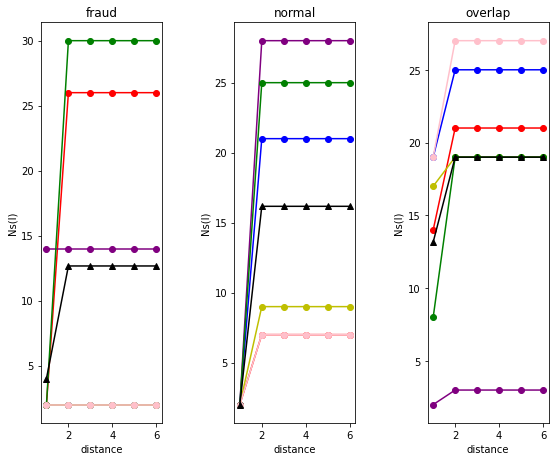

In [ ]:
#set distance
distance=6
#build 6 graph based on 6 fraud node's snowball samling
N1=[]
for i in range(len(fraud_nodes_6)):
  G1,node=snowball(df,fraud_nodes_6[i],distance)
  N1+=node

H1 = np.array(N1).reshape(6,distance)

#the mean node number of 6 graphs
mean1=H1.mean(axis=0)
# x axis
x = [1,2,3,4,5,6]

ax = plt.subplot(1,3,1)


L1=ax.plot(x, H1[0],  c='r', marker="o")
L2=ax.plot(x, H1[1], c='b', marker="o")
L3=ax.plot(x, H1[2],  c='y', marker="o",)
L4=ax.plot(x, H1[3], c='purple', marker="o")
L5=ax.plot(x, H1[4],  c='g', marker="o")
L6=ax.plot(x, H1[5],  c='pink', marker="o")
L7=ax.plot(x, mean1,  c='black', marker="^")

plt.xlabel("distance")
plt.ylabel("Ns(l)")
plt.title("fraud")

#build 6 graph based on 6 normal node's snowball samling
ax = plt.subplot(1,3,2)

N2=[]
for i in range(len(normal_nodes_6)):
  G2,node=snowball(df,normal_nodes_6[i],distance)
  N2+=node

H2 = np.array(N2).reshape(6,distance)

mean2=H2.mean(axis=0)

L1=ax.plot(x, H2[0],  c='r', marker="o")
L2=ax.plot(x, H2[1], c='b', marker="o")
L3=ax.plot(x, H2[2],  c='y', marker="o",)
L4=ax.plot(x, H2[3], c='purple', marker="o")
L5=ax.plot(x, H2[4],  c='g', marker="o")
L6=ax.plot(x, H2[5],  c='pink', marker="o")
L7=ax.plot(x, mean2,  c='black', marker="^")
plt.xlabel("distance")
plt.ylabel("Ns(l)")
plt.title("normal")


#build 6 graph based on 6 normal node for comparision purpose
ax = plt.subplot(1,3,3)

N3=[]
for i in range(len(overlap)):
  G3,node=snowball(df,overlap[i],distance)
  N3+=node

H3 = np.array(N3).reshape(6,distance)
mean3=H3.mean(axis=0)

L1=ax.plot(x, H3[0],  c='r', marker="o")
L2=ax.plot(x, H3[1], c='b', marker="o")
L3=ax.plot(x, H3[2],  c='y', marker="o",)
L4=ax.plot(x, H3[3], c='purple', marker="o")
L5=ax.plot(x, H3[4],  c='g', marker="o")
L6=ax.plot(x, H3[5],  c='pink', marker="o")
L7=ax.plot(x, mean3,  c='black', marker="^")
plt.xlabel("distance")
plt.ylabel("Ns(l)")
plt.title("overlap")

plt.subplots_adjust(left=0.125,bottom=-0.51,right=1.3,top=0.88,wspace=0.6,hspace=0.2)
plt.show()

### 3.5.2 Normal and fraud's in-degree out-degree comparision

The in-degree is how many in-coming edges point to this node, the out-degree is how many out-coming edges point to this node, from the in-degree and out-degree we know more about the transaction frequency of an account.

In [ ]:
#get in-degree and out-degree of fraud samples and normal samples
fraud_in_degree = [d for n, d in G_fraud.in_degree()]
fraud_out_degree = [d for n, d in G_fraud.out_degree()]
normal_in_degree = [d for n, d in G_normal.in_degree()]
normal_out_degree = [d for n, d in G_normal.out_degree()]

We plot the in-degree and out-degrees correlation of fraud and normal samples respectively.
Noticeably, there's no correlation between both.
However, we can tell that, normal's in-degree concentrate on 0-20, and out-degree concentrate on 0-10. Fraud's in-degree concentrate on 0-30, and out-degree concentrate on 0-15. We can say that the fraud sample has more high-degree nodes than normal's, fraud account has transaction more frequent than normal account.

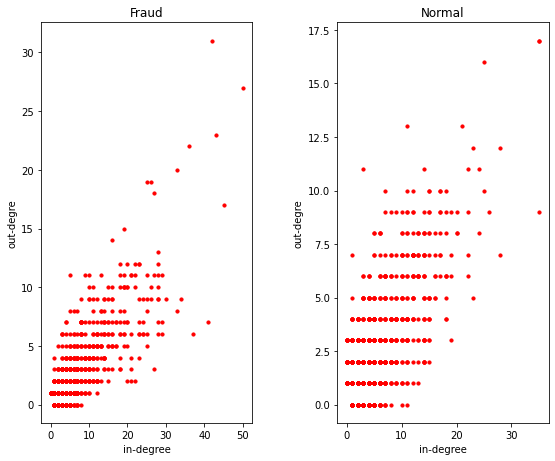

In [ ]:
#in degree and out degree correlation
#fraud
fig = plt.figure()
ax2 = fig.add_subplot(1,2,1)

ax2.scatter(fraud_in_degree, fraud_out_degree, s=10, c='r', marker="o")
plt.xlabel("in-degree")
plt.ylabel("out-degre")
plt.title("Fraud")

#normal
ax3 = fig.add_subplot(1,2,2)

ax3.scatter(normal_in_degree, normal_out_degree, s=10, c='r', marker="o")
plt.xlabel("in-degree")
plt.ylabel("out-degre")
plt.title("Normal")

plt.subplots_adjust(left=0.125,bottom=-0.51, right=1.3, top=0.88,wspace=0.4,hspace=0.2)

plt.show()

We plot cumulative in-degree and out-degree distribution of fraud and normal samples.

First of all, in-degree is higher than out-degree in both fraud and normal samples. That means, most nameDest accounts receive money more frequently than transfer money out. Secondly, once the degree increase, the higher distribution for fraud in-degree compares to normal in-degree, the same as the out-degree.

**Considering this graph and the last graph, we can conclude that when in-degree or out-degree is larger than a particular value, the number of fraud accounts having large in-degree and out-degree is larger than that of normal accounts. It means that a bank account having transactions with a large number of accounts tends to be fraudulent.**

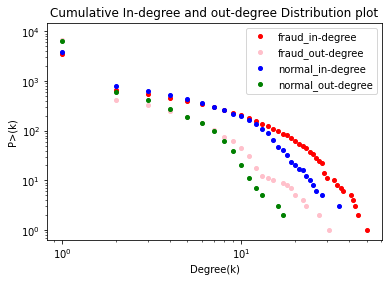

In [ ]:
# fig4
# cumulative distribution of fraud sample's indegree and out degree
degree_sequence_in = sorted(fraud_in_degree, reverse=True)
degreeCount_in = collections.Counter(degree_sequence_in)
deg_in, cnt_in = zip(*degreeCount_in.items())
cs_in = np.cumsum(cnt_in)
degree_sequence_out = sorted(fraud_out_degree, reverse=True)
degreeCount_out = collections.Counter(degree_sequence_out)
deg_out, cnt_out = zip(*degreeCount_out.items())
cs_out = np.cumsum(cnt_out)

fig,ax = plt.subplots()

L1=ax.loglog(deg_in, cs_in,'go' , linewidth=0.01,color='r',markersize=4,label='fraud_in-degree')

L2=ax.loglog(deg_out, cs_out,'go' , linewidth=0.5, color='pink',markersize=4,label='fraud_out-degree')

#cumulative distribution of normal sample's indegree and out degree
degree_sequence_in = sorted(normal_in_degree, reverse=True)
degreeCount_in = collections.Counter(degree_sequence_in)
deg_in, cnt_in = zip(*degreeCount_in.items())
cs_in = np.cumsum(cnt_in)
degree_sequence_out = sorted(normal_out_degree, reverse=True)
degreeCount_out = collections.Counter(degree_sequence_out)
deg_out, cnt_out = zip(*degreeCount_out.items())
cs_out = np.cumsum(cnt_out)
L3=ax.loglog(deg_in, cs_in,'go' , linewidth=0.01,color='b',markersize=4,label='normal_in-degree')

L4=ax.loglog(deg_out, cs_out,'go' , linewidth=0.5, color='green',markersize=4,label='normal_out-degree')
ax.legend()
plt.title("Cumulative In-degree and out-degree Distribution plot")
plt.ylabel("P>(k)")
plt.xlabel("Degree(k)")
plt.show()

### 3.5.3 Normal and fraud's weight comparision  

The weight refers to the transaction amount of each edge as we set before.
As we are interested in the transaction amount between normal's accounts and between fraud's accounts, therefore, we will more focus on G_normal_T and G_fraud_T.

In [ ]:
# compare the coorelation of weight
weight_normal_T = list([w["total_transaction_amount"] for u,v,w in G_normal_T.edges(data=True)])
weight_fraud_T = list([w["total_transaction_amount"] for u,v,w in G_fraud_T.edges(data=True)])

As the graph shows, there is no correlation between normal's weight and fraud's weight. Furthermore, normal's weight is concentrate on 0-1,000,000 but fraud's weight is concentrate on 0-4,000,000, more weight of fraud even up to 10,000,000.

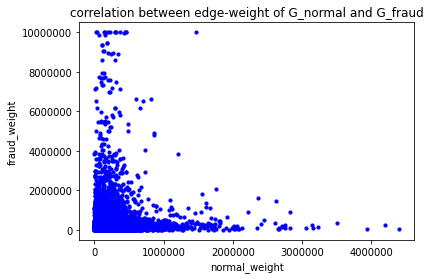

In [ ]:
#correlation between G_normal and G_fraud
x = weight_normal_T
y = weight_fraud_T
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x, y, s=10, c='b', marker="o")
plt.xlabel("normal_weight")
plt.ylabel("fraud_weight")
plt.title("correlation between edge-weight of G_normal and G_fraud")
plt.ticklabel_format(style = 'plain')

plt.show()

We plot cumulative weight of fraud_T and normal_T Distribution, from the plot we can see before weight over 10^5(100,000),fraud weight and normal weight have similar distribution, but after 10^5 there is a gap between fraud weight and normal weight, fraud sample start to have higher distribution than normal's, more fraud accounts have higher weight than normal accounts.

**Combine those two graphs,we can say the transaction amount between fraud account is more tend to higher than that between normal accounts.**

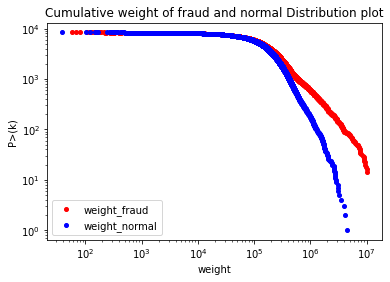

In [ ]:
#cumulative weight distribution of fraud and normal
degree_sequence_in = sorted(weight_fraud_T, reverse=True)
degreeCount_in = collections.Counter(degree_sequence_in)
deg_in, cnt_in = zip(*degreeCount_in.items())
cs_in = np.cumsum(cnt_in)

degree_sequence_out = sorted(weight_normal_T, reverse=True)
degreeCount_out = collections.Counter(degree_sequence_out)
deg_out, cnt_out = zip(*degreeCount_out.items())
cs_out = np.cumsum(cnt_out)

fig,ax = plt.subplots()

L1=ax.loglog(deg_in, cs_in,'go' , linewidth=0.01,color='r',markersize=4,label='weight_fraud')

L2=ax.loglog(deg_out, cs_out,'go' , linewidth=0.5, color='b',markersize=4,label='weight_normal')

ax.legend()
plt.title("Cumulative weight of fraud and normal Distribution plot")
plt.ylabel("P>(k)")
plt.xlabel("weight")
plt.show()

### 3.5.4 Normal and fraud's in-strength, out strength comparision

In-strength refers to the sum of the in-coming edge's weight, out-strength refers to the sum of the out-coming edge's weight, they are good indicator of how much an account total amount of money that transfer in and transfer out. We would like to explore the difference between fraud's and normal's.

In [ ]:
#get in-strength and out-strenght of normal
in_nor_T= [val for (node, val) in G_normal_T.in_degree(weight='total_transaction_amount')]
out_nor_T= [val for (node, val) in G_normal_T.out_degree(weight='total_transaction_amount')]
# in_nor_N= [val for (node, val) in G_normal_N.in_degree(weight='total_transaction_amount')]
# out_nor_N= [val for (node, val) in G_normal_N.out_degree(weight='total_transaction_amount')]

In [ ]:
in_fra_T= [val for (node, val) in G_fraud_T.in_degree(weight='total_transaction_amount')]
out_fra_T= [val for (node, val) in G_fraud_T.out_degree(weight='total_transaction_amount')]
# in_fra_N= [val for (node, val) in G_fraud_N.in_degree(weight='total_transaction_amount')]
# out_fra_N= [val for (node, val) in G_fraud_N.out_degree(weight='total_transaction_amount')]

We plot a scatter graph to explore the correlation between in-strength and out-strength of the fraud graph and the normal graph. From the scatter we can tell there is no correlation between in-strength and out-strength in either graph. And some fraud in-strength and out-strength could be much higher than normal's.

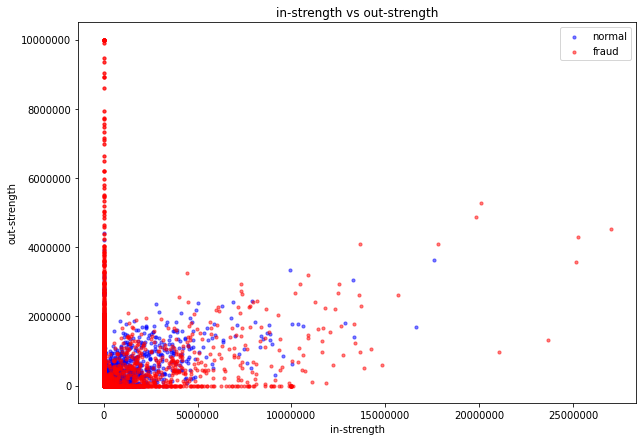

In [ ]:
#fig7
#correlation between instrenght and out strength
fig,ax = plt.subplots(figsize =(10, 7))

L1=ax.scatter(in_nor_T, out_nor_T, s=10, c='b', marker="o",alpha=0.5, label='normal')
L2=ax.scatter(in_fra_T, out_fra_T, s=10, c='r', marker="o",alpha=0.5, label='fraud')
ax.legend()
plt.ticklabel_format(style = 'plain')
plt.xlabel("in-strength")
plt.ylabel("out-strength")
plt.title("in-strength vs out-strength")

plt.show()

We also plot the histogram for in-strength of fraud graph and normal graph. From the plot we can tell the in-strength of fraud concerntrate on 0-2500,000 but in-strength of normal is concerntrate on 0-1250,000.

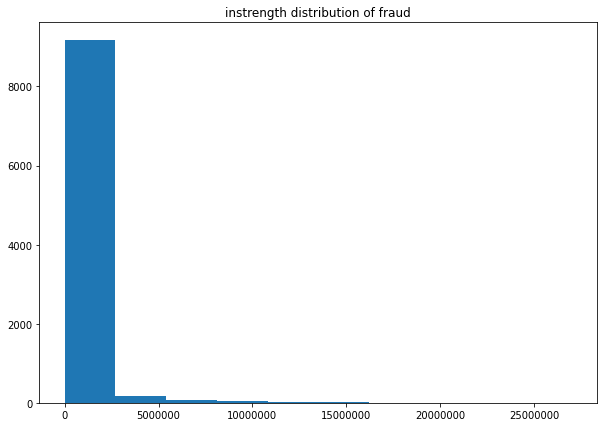

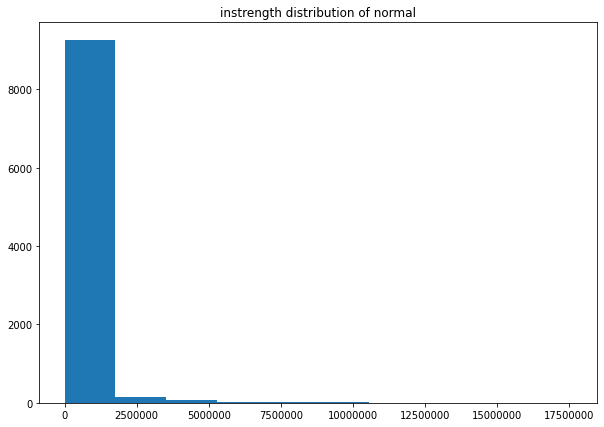

In [ ]:
#histgram for instrength of frand and normal
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(in_fra_T)
plt.ticklabel_format(style = 'plain')
plt.title("instrength distribution of fraud")
plt.show()

fig, ax = plt.subplots(figsize =(10, 7))

plt.title("instrength distribution of normal")
L2=ax.hist(in_nor_T)
plt.ticklabel_format(style = 'plain')

plt.show()

We plot in-strength and out-strength of G_normal_T and G_fraud_T.

As the strength of G_normal_T and G_fraud_T total transaction amount or from an account, we could say in our dataset, nameDest have much higher in-strenght and out-strength than nameOrig, as they have multiple transactions with other accounts. So, when strength value is high, we can say it represent fraud account(nameDest) and normal account(nameDest).

When strength over 10^5, fra_in has the highest distribution, next is fra_out, followed by nor_in and nor_out. That is to say, more fraud accounts has high amount of in-coming transaction than out-coming transaction, the same situation happens to normal accounts. **Noticeably, when the strength (total inflow or outflow) is larger than a particular value, the number of fraud accounts having a large total inflow or outflow is larger than that of normal accounts.**

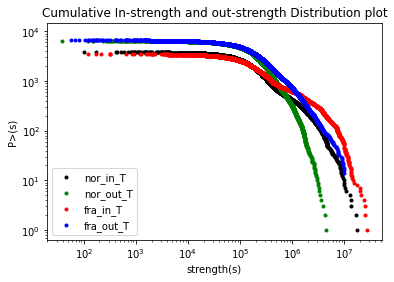

In [ ]:
# fig9
# Cumulative In-strength and out-strength Distribution plot of normal and fraud
str_in_T= sorted(in_nor_T, reverse=True)
strCount_in_T = collections.Counter(str_in_T)
strin_T, cnt_in_T = zip(*strCount_in_T.items())
cs_in_T = np.cumsum(cnt_in_T)

str_out_T= sorted(out_nor_T, reverse=True)
strCount_out_T = collections.Counter(str_out_T)
strout_T, cnt_out_T = zip(*strCount_out_T.items())
cs_out_T = np.cumsum(cnt_out_T)

str_in_F= sorted(in_fra_T, reverse=True)
strCount_in_F = collections.Counter(str_in_F)
strin_F, cnt_in_F = zip(*strCount_in_F.items())
cs_in_F = np.cumsum(cnt_in_F)

str_out_F= sorted(out_fra_T, reverse=True)
strCount_out_F = collections.Counter(str_out_F)
strout_F, cnt_out_F = zip(*strCount_out_F.items())
cs_out_F = np.cumsum(cnt_out_F)

#plot
fig,ax = plt.subplots()

L1=ax.loglog(strin_T, cs_in_T,'go' , linewidth=0.01,color='black',markersize=3,label='nor_in_T')

L2=ax.loglog(strout_T, cs_out_T,'go' , linewidth=0.5, color='g',markersize=3,label='nor_out_T')

L3=ax.loglog(strin_F, cs_in_F,'go' , linewidth=0.01,color='r',markersize=3,label='fra_in_T')

L4=ax.loglog(strout_F, cs_out_F,'go' , linewidth=0.5, color='b',markersize=3,label='fra_out_T')

ax.legend()
plt.title("Cumulative In-strength and out-strength Distribution plot")
plt.ylabel("P>(s)")
plt.xlabel("strength(s)")
plt.show()

### 3.5.5  Cumulative edge-weight distribution for for G_T and G_N

The cumulative edge-weight distributions for G_T and G_N are shown in the following graph. For the G_T, the edge weights of all nodes are 1 because there is only one transaction that happened between two accounts. So that is why there is only a single point in the graph. For the G_N, it shows that this network has a stable edge-weight distribution where the edge weight is between 100 and 10000, and it has a decaying edge-weight distribution where the edge weight is above 10000. **It means that transactions with extremely high amounts are abnormal, which have a high potential to be fraudulent transactions. In this project, the transactions with the amount of 10000000 are very likely to be fraudulent transactions.**

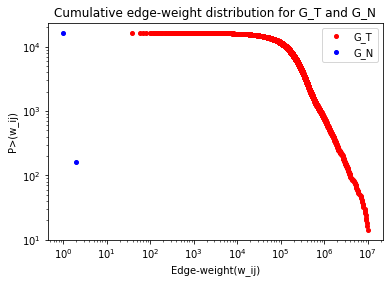

In [ ]:
# Fig. 10

weight_sequence_T = sorted([w["total_transaction_amount"] for u,v,w in G_T.edges(data=True)], reverse=True)  # degree sequence
weightCount_T = collections.Counter(weight_sequence_T)
weight_T, cnt_T = zip(*weightCount_T.items())
cs_T = np.cumsum(cnt_T)

weight_sequence_N = sorted([w["total_transaction"] for u,v,w in G_N.edges(data=True)], reverse=True)  # degree sequence
weightCount_N = collections.Counter(weight_sequence_N)
weight_N, cnt_N = zip(*weightCount_N.items())
cs_N = np.cumsum(cnt_N)

fig,ax = plt.subplots()
# ax1 = fig.add_subplot(111)

# plt.loglog(deg, cs, 'bo')
L1=ax.loglog(weight_T, cs_T,'go' , linewidth=0.01,color='r',markersize=4,label='G_T')
# ax2=ax.twinx()
L2=ax.loglog(weight_N, cs_N,'go' , linewidth=0.5, color='b',markersize=4,label='G_N')
ax.legend()
# # plt.loglog(deg, cs, 'bo')
plt.title("Cumulative edge-weight distribution for G_T and G_N")
plt.ylabel("P>(w_ij)")
plt.xlabel("Edge-weight(w_ij)")
plt.show()

In [ ]:
#in-strenght and out-strength
in_str_T= [val for (node, val) in G_T.in_degree(weight='total_transaction_amount')]
out_str_T= [val for (node, val) in G_T.out_degree(weight='total_transaction_amount')]
in_str_N= [val for (node, val) in G_N.in_degree(weight='total_transaction')]
out_str_N= [val for (node, val) in G_N.out_degree(weight='total_transaction')]

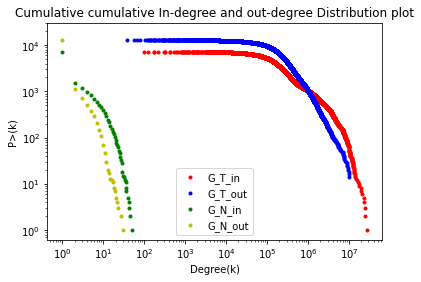

In [ ]:
# fig 11
degree_sequence_in = sorted([d for n, d in G.in_degree()], reverse=True)  # degree sequence
degreeCount_in = collections.Counter(degree_sequence_in)
deg_in, cnt_in = zip(*degreeCount_in.items())
cs_in = np.cumsum(cnt_in)

# sorted([val for (node, val) in G_T.in_degree(weight='weight')], reverse=True)
str_in_T= sorted(in_str_T, reverse=True)   # degree sequence
strCount_in_T = collections.Counter(str_in_T)
strin_T, cnt_in_T = zip(*strCount_in_T.items())
cs_in_T = np.cumsum(cnt_in_T)

str_out_T= sorted(out_str_T, reverse=True) # degree sequence
strCount_out_T = collections.Counter(str_out_T)
strout_T, cnt_out_T = zip(*strCount_out_T.items())
cs_out_T = np.cumsum(cnt_out_T)

str_in_N= sorted(in_str_N, reverse=True)  # degree sequence
strCount_in_N = collections.Counter(str_in_N)
strin_N, cnt_in_N = zip(*strCount_in_N.items())
cs_in_N = np.cumsum(cnt_in_N)

str_out_N= sorted(out_str_N, reverse=True)  # degree sequence
strCount_out_N = collections.Counter(str_out_N)
strout_N, cnt_out_N = zip(*strCount_out_N.items())
cs_out_N = np.cumsum(cnt_out_N)

fig,ax = plt.subplots()
# ax1 = fig.add_subplot(111)

# plt.loglog(deg, cs, 'bo')
L1=ax.loglog(strin_T, cs_in_T,'go' , linewidth=0.01,color='r',markersize=3,label='G_T_in')
# ax2=ax.twinx()
L2=ax.loglog(strout_T, cs_out_T,'go' , linewidth=0.5, color='b',markersize=3,label='G_T_out')

L3=ax.loglog(strin_N, cs_in_N,'go' , linewidth=0.01,color='g',markersize=3,label='G_N_in')
# ax2=ax.twinx()
L4=ax.loglog(strout_N, cs_out_N,'go' , linewidth=0.5, color='y',markersize=3,label='G_N_out')
# plt.loglog(deg, cs, 'bo')
ax.legend()
plt.title("Cumulative cumulative In-degree and out-degree Distribution plot")
plt.ylabel("P>(k)")
plt.xlabel("Degree(k)")
plt.show()

### 3.5.6 Average neighbor In-degree versus In-degree and average neighbor out-degree versus out-degree

Average neighbour In-degree versus In-degree and average neighbour out-degree versus out-degree are shown in the following graph. It is found that the average neighbour in-degree/out-degree doesn't have a high correlation with in-degree/out-degree. It means that the number of accounts pointing to a particular account doesn't relate to the average number of accounts pointing to its neighbour accounts. Also, the number of accounts pointing out a particular account doesn't relate to the average number of accounts pointing out its neighbour accounts.

In [ ]:
# Fig. 10
average_neighbor_degree_in = []
average_neighbor_degree_out = []
for i in list(G.nodes):
  average_neighbor_degree_in.append(nx.average_neighbor_degree(G, source="in+out", target="in")[i])
  average_neighbor_degree_out.append(nx.average_neighbor_degree(G, source="in+out", target="out")[i])

In [ ]:
in_degreeX= [d for n, d in G.in_degree()]
out_degreeX=[d for n, d in G.out_degree()]

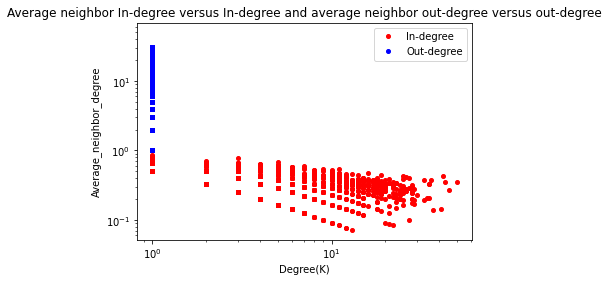

In [ ]:
fig,ax = plt.subplots()

L1=ax.loglog(in_degreeX, average_neighbor_degree_in,'go' , linewidth=0.01,color='r',markersize=4,label='In-degree')
# ax2=ax.twinx()
L2=ax.loglog(out_degreeX, average_neighbor_degree_out,'go' , linewidth=0.5, color='b',markersize=4,label='Out-degree')
ax.legend()
# # plt.loglog(deg, cs, 'bo')
plt.title("Average neighbor In-degree versus In-degree and average neighbor out-degree versus out-degree")
plt.ylabel("Average_neighbor_degree")
plt.xlabel("Degree(K)")
plt.show()

### 3.5.7 Average Neighbor In-strength versus In-strength and average neighbor out-strength versus out-strength

Average Neighbor In-strength versus In-strength and average neighbor out-strength versus out-strength for the G_T network are shown in the following graph. It is found that the average neighbour in-strength/out-strength doesn't have a high correlation with in-strength/out-strength. It means that the money amounts pointing to a particular account doesn't relate to the average money amounts pointing to its neighbour accounts. Also, the money amounts pointing out a particular account doesn't relate to the average money amounts pointing out its neighbour accounts.

In [ ]:
#Fig.11(i)
average_neighbor_strength_in_T = []
average_neighbor_strength_out_T = []
for i in list(G_T.nodes):
  average_neighbor_strength_in_T.append(nx.average_neighbor_degree(G_T, source="in+out", target="in", weight = "total_transaction_amount")[i])
  average_neighbor_strength_out_T.append(nx.average_neighbor_degree(G_T, source="in+out", target="out", weight = "total_transaction_amount")[i])

KeyboardInterrupt: ignored

In [ ]:
fig,ax = plt.subplots()

L1=ax.loglog(in_str_T, average_neighbor_strength_in_T,'go' , linewidth=0.01,color='r',markersize=4,label='In-strength')
# ax2=ax.twinx()
L2=ax.loglog(out_str_T, average_neighbor_strength_out_T,'go' , linewidth=0.5, color='b',markersize=4,label='Out-strength')
ax.legend()
# # plt.loglog(deg, cs, 'bo')
plt.title("Average Neighbor In-strength versus In-strength and average neighbor out-strength versus out-strength in G_T")
plt.xlabel("Strength(s)")
plt.ylabel("Average Neighbor Strength")
plt.show()

Average Neighbor In-strength versus In-strength and average neighbor out-strength versus out-strength for the G_N network are shown in the following graph. It is found that the average neighbour in-strength/out-strength doesn't have a high correlation with in-strength/out-strength. It means that the number of transactions pointing to a particular account doesn't relate to the average number of transactions pointing to its neighbour accounts. Also, the number of transactions pointing out a particular account doesn't relate to the average number of transactions pointing out its neighbour accounts.

In [ ]:
#Fig.11(ii)
average_neighbor_strength_in_N = []
average_neighbor_strength_out_N = []
for i in list(G_N.nodes):
  average_neighbor_strength_in_N.append(nx.average_neighbor_degree(G_N, source="in+out", target="in", weight = "total_transaction")[i])
  average_neighbor_strength_out_N.append(nx.average_neighbor_degree(G_N, source="in+out", target="out", weight = "total_transaction")[i])

In [ ]:
fig,ax = plt.subplots()

L1=ax.loglog(in_str_N, average_neighbor_strength_in_N,'go' , linewidth=0.01,color='r',markersize=4,label='In-strength')

L2=ax.loglog(out_str_N, average_neighbor_strength_out_N,'go' , linewidth=0.5, color='b',markersize=4,label='Out-strength')
ax.legend()
# # plt.loglog(deg, cs, 'bo')
plt.title("Average Neighbor In-strength versus In-strength and average neighbor out-strength versus out-strength in G_N")
plt.xlabel("Strength(s)")
plt.ylabel("Average Neighbor Strength")
plt.show()

### 3.5.8 Clustering coefficient under degree

Figure 12 is the average clustering coefficient versus degree for G, G_T, and G_N. We know that the clustering coefficient can be used to measure if some nodes in a graph tend to cluster together. We may find out the implied connections within neighboring accounts to check the relationship between clustering coefficient and the degree of nodes. In this experiment, we calculate the degree under various sources first: G, G_T, and G_N, and get the clustering coefficient under each source. After these two metrics calculations, we average the clustering coefficient among all the nodes with degree k to plot its relationship in the graph.

However, based on the graph results, we realized the clustering coefficient under these sources is 0, which represents there are hardly any connections in the neighborhood within the sources. It is understandable for these results as the dataset provided in A3 is a resized dataset, and the samples in this dataset are part of the full map, which cannot represent the whole connection.


In [ ]:
# Fig.12
# degree under various source
G_2 = nx.convert_node_labels_to_integers(G, first_label=0)
G_2_degree = dict(G_2.degree())
G_2_degree = list(G_2_degree.values())

G_T = nx.convert_node_labels_to_integers(G_T, first_label=0)
G_T_degree = dict(G_T.degree())
G_T_degree = list(G_T_degree.values())

G_N = nx.convert_node_labels_to_integers(G_N, first_label=0)
G_N_degree = dict(G_N.degree())
G_N_degree = list(G_N_degree.values())

# clustering of each nodes
vcc_G = []
for i in G_2.nodes():
    vcc_G.append(nx.clustering(G_2, i))
vcc_G= np.array(vcc_G)
avc = nx.average_clustering(G_2)

vcc_GT = []
for i in G_T.nodes():
    vcc_GT.append(nx.clustering(G_T, i))
vcc_GT= np.array(vcc_GT)
avc = nx.average_clustering(G_T)

vcc_GN = []
for i in G_N.nodes():
    vcc_GN.append(nx.clustering(G_N, i))
vcc_GN= np.array(vcc_GN)
avc = nx.average_clustering(G_N)

In [ ]:
#Average clustering for each degree k
ck_G = list()
ks_G = list()
for k in np.arange(np.min(G_2_degree), np.max(G_2_degree)):
    aux = G_2_degree == k
    if(len(vcc_G[aux]) > 0):
        cm = np.mean(vcc_G[aux]) #average clustering among all the nodes with degree k
        ck_G.append(cm)
        ks_G.append(k)

ck_GT = list()
ks_GT = list()
for k in np.arange(np.min(G_T_degree), np.max(G_T_degree)):
    aux = G_T_degree == k
    if(len(vcc_GT[aux]) > 0):
        cm = np.mean(vcc_GT[aux]) #average clustering among all the nodes with degree k
        ck_GT.append(cm)
        ks_GT.append(k)

ck_GN = list()
ks_GN = list()
for k in np.arange(np.min(G_N_degree), np.max(G_N_degree)):
    aux = G_N_degree == k
    if(len(vcc_GN[aux]) > 0):
        cm = np.mean(vcc_GN[aux]) #average clustering among all the nodes with degree k
        ck_GN.append(cm)
        ks_GN.append(k)

L1=ax.loglog(ks_G, ck_G,'go' , linewidth=0.01,color='r',markersize=4,label='G')
L2=ax.loglog(ks_GT, ck_GT,'go' , linewidth=0.5, color='b',markersize=4,label='G_T')
L2=ax.loglog(ks_GN, ck_GN,'go' , linewidth=0.5, color='g',markersize=4,label='G_N')

ax.legend()

plt.title("Clustering coefficient according to degree")
plt.ylabel("Clustering Coefficient")
plt.xlabel("Degree (k)")
plt.show(True)

### 3.5.9 Number of Communities versus community size under G

Figure 13 is about the number of communities versus community size under G. we know that the community in networks refers to the nodes connected more densely than the rest of the nodes in other communities. In this experiment, we aim to detect the communities and their size under source G. Thus, we import the community.greedy_modularity_communities to detect communities in this network first, then go through each of the communities and count the member of each community. **We can observe from the graph that most of the communities are small-size communities, and the community size of big-size communities under this network is even smaller than 10.** We think the communities distribution under this dataset is understandable with the features of this network.

In [ ]:
# Fig.13
communities_G = community.greedy_modularity_communities(G)
# Create empty dictionary
modularity_class = {}
#Loop through each community in the network
for community_number, community in enumerate(communities_G):
    #For each member of the community, add their community number
    for name in community:
        modularity_class[name] = community_number

# now we add that to the network as an attribute
nx.set_node_attributes(G, modularity_class, 'modularity_class')

# communities_G_T = community.greedy_modularity_communities(G_T,'total_transaction_amount')
# # Create empty dictionary
# modularity_class = {}
# #Loop through each community in the network
# for community_number, community in enumerate(communities_G_T):
#     #For each member of the community, add their community number
#     for name in community:
#         modularity_class[name] = community_number

# # now we add that to the network as an attribute
# nx.set_node_attributes(G_T, modularity_class, 'modularity_class')

# communities_G_N = community.greedy_modularity_communities(G_N, 'total_transaction')
# # Create empty dictionary
# modularity_class = {}
# #Loop through each community in the network
# for community_number, community in enumerate(communities_G_N):
#     #For each member of the community, add their community number
#     for name in community:
#         modularity_class[name] = community_number

# # now we add that to the network as an attribute
# nx.set_node_attributes(G_N, modularity_class, 'modularity_class')


In [ ]:
communities_G = pd.DataFrame(G.nodes(data='modularity_class'), columns=['node', 'modularity_class'])
communities_G = communities_G.groupby(['modularity_class'])['node'].count().reset_index()

# communities_G_T = pd.DataFrame(G_T.nodes(data='modularity_class'), columns=['node', 'modularity_class'])
# communities_G_T = communities_G_T.groupby(['modularity_class'])['node'].count().reset_index()

# communities_G_N = pd.DataFrame(G_N.nodes(data='modularity_class'), columns=['node', 'modularity_class'])
# communities_G_N = communities_G_N.groupby(['modularity_class'])['node'].count().reset_index()

In [ ]:
# plot
# fig,ax = plt.subplots()
communities_G.plot(kind='scatter', x='node', y='modularity_class', loglog=True)
# ax = communities_G.plot(kind='scatter', x='node', y='modularity_class', loglog=True)
# communities_G_T.plot(ax=ax, x='node', y='modularity_class')
# communities_G_N.plot(ax=ax, x='node', y='modularity_class')
# ax.legend()
plt.title("No. of Communities versus community size.")
plt.ylabel("No. of Communities having Size c")
plt.xlabel("Community Size (c)")
plt.show()

### 3.5.10 K-core distribution under G

Figure 14 is about the distribution of nodes from the periphery to the core. After research, we know the k-core would be the maximal subgraph of G, which contains the nodes of degree k or more. In this experiment, we aim to check this network's node distribution. Thus, we import the function of core_number under the library NetworkX to get the list of core numbers for each vertex. It can be found from the graph that each node almost has the same degree in this network, so the graph distribution is like the delta distribution in this case. We explore the reseized datasets provided in A3; this shape is also understandable in this case.

In [ ]:
# Fig.14
core_no = nx.core_number(G)
core_no_sequence = sorted([c for c in core_no], reverse=True)

core_no_In = collections.Counter(core_no_sequence)
core, cnt_co = zip(*core_no_In.items())

cs_co = np.cumsum(cnt_co)

fig,ax = plt.subplots()
L_BC = ax.loglog(core, cs_co, 'go', linewidth=0.01,color='r',markersize=4)
ax.legend()
plt.title("")
plt.ylabel("P>(Ks))")
plt.xlabel("Core-Number (Ks)")
plt.show()

### 3.5.11 Betweenness_centrality distribution under G

Figure 15 is about the cumulative edge betweenness centrality for the G. The betweenness centrality is used to calculate for any given node in a network, how many shortest paths would pass this node. In this experiment, we import the nx.betweenness_centrality to measure its results under each node and plot it within the picture below. The picture shows that only a few transactions happen within various nodes.

In [ ]:
# Fig.15
BC = nx.betweenness_centrality(G)
BC_sequence = sorted([bc for bc in BC], reverse=True)

BC_Count_In = collections.Counter(BC_sequence)
bcc, cnt_bc = zip(*BC_Count_In.items())

cs_bc = np.cumsum(cnt_bc)

fig,ax = plt.subplots()
L_BC = ax.loglog(bcc, cs_bc, 'go', linewidth=0.01,color='r',markersize=4)
ax.legend()
plt.title("cumulative edge betweenness centrality")
plt.ylabel("P>(BC)")
plt.xlabel("Betweenness Centrality (BC)")
plt.show()

In addition, we can find from the table results that only 107 nodes with more than 0 betweenness_centrality are out of the sample network.

In [ ]:
# check betweenness_centrality distribution
BC_dataFrame = pd.DataFrame(BC.items(), columns=['Node', 'betweenness_centrality'])
print('Total of Nodes in the sample datasets: ', BC_dataFrame['Node'].count() )
print('Total of betweenness_centrality > 0 in the sample datasets: ', BC_dataFrame[BC_dataFrame['betweenness_centrality']>0].count() )

### 3.5.12 PageRank distribution under G

Figure 16 is about the cumulative PageRank distribution on the network G. PageRank has been applied in this experiment and has been used to calculate the importance of a node in the network. We import the nx. Pagerank to calculate the score of each node and plot the results in the below picture. We can see from the picture that most of the nodes in this sample graph have similar scores, and it is hard to find out which node is more important than others.

In [ ]:
# Fig.16
PR = nx.pagerank(G)
PR_sequence = sorted([pr for pr in PR], reverse=True)

PR_Count_In = collections.Counter(PR_sequence)
prc, cnt_pr = zip(*PR_Count_In.items())

cs_pr = np.cumsum(cnt_pr)

fig,ax = plt.subplots()
L_BC = ax.loglog(prc, cs_pr, 'go', linewidth=0.01,color='r',markersize=4)
ax.legend()
plt.title("The cumulative PageRank distribution on network G")
plt.ylabel("P>(PR)")
plt.xlabel("PageRank (PR)")
plt.show()

### 3.5.13 Generating node features

A node is considered fraudulent if it has at least one fraudulent transaction.

In [ ]:
nodes = list(G.nodes())
arr = np.zeros((len(nodes),1))

columns_name = ['is_fraud']
df_nodes = pd.DataFrame(arr, columns= columns_name,index=nodes)

Based on our statistical analysis, we decided to generate the node features of **degree, in-degree, out-degree, strength_T, in_strength_T, out_strength_T, strength_N, in_strength_N, out_strength_N, degree prestige, gregariousness and Proximity_Prestige** because we think they are the potential factors affecting fraudulent accounts. Due to the computational capacity, it takes a long time to get the result of proximity prestige. So we mute the code.  

In [ ]:
# Used for node classification

df_nodes["degree"] = [d for n, d in G.degree(df_nodes.index)]
df_nodes["in_degree"] = [d for n, d in G.in_degree(df_nodes.index)]
df_nodes["out_degree"] = [d for n, d in G.out_degree(df_nodes.index)]

df_nodes["strength_T"] = [d for n, d in G_T.degree(df_nodes.index, weight='total_transaction_amount')]
df_nodes["in_strength_T"] = [d for n, d in G_T.in_degree(df_nodes.index, weight='total_transaction_amount')]
df_nodes["out_strength_T"] = [d for n, d in G_T.out_degree(df_nodes.index, weight='total_transaction_amount')]

df_nodes["strength_N"] = [d for n, d in G_N.degree(df_nodes.index, weight='total_transaction')]
df_nodes["in_strength_N"] = [d for n, d in G_N.in_degree(df_nodes.index, weight='total_transaction')]
df_nodes["out_strength_N"] = [d for n, d in G_N.out_degree(df_nodes.index, weight='total_transaction')]

# Degree Prestige
df_nodes["degree_prestige"] = [d/(len(df_nodes) - 1) for n, d in G.in_degree(df_nodes.index)]

# Gregariousness
df_nodes["gregariousness"] = [d/(len(df_nodes) - 1) for n, d in G.out_degree(df_nodes.index)]

# Proximity Prestige
# distance = []
# temp_dis = 0
# n = 0
# for dest, d in G.degree(df_nodes.index):
#     temp_dis = 0
#     n = 0
#     for src, d in G.degree(df_nodes.index):
#         if (nx.has_path(G,src,dest) == True):
#             temp_dis = temp_dis + nx.shortest_path_length(G,source = src,target = dest)
#             n = n + 1
#     if temp_dis == 0:
#         distance.append([dest, 0])
#     else:
#         distance.append([dest, temp_dis/(n - 1)])

# df_Proximity_Prestige= pd.DataFrame(distance)
# df_Proximity_Prestige.rename(columns = {0:'node_dest', 1:'Proximity_Prestige'}, inplace = True)
# df_nodes['Proximity_Prestige'] = df_Proximity_Prestige['Proximity_Prestige'].values

#betweenness centrality
#df_nodes["betweenness_centrality"] = nx.betweenness_centrality(G)[df_nodes.index]

#closeness centrality
#df_nodes["closeness_centrality"] = nx.closeness_centrality(G)[df_nodes.index]

#df_nodes["clustering_coefficient"] = nx.clustering(G, nodes = df_nodes.index)
#df_nodes["weighted_clustering_coefficient"] = nx.clustering(G_T, nodes = df_nodes.index, weight='total_transaction_amount')

#df_nodes["average_neighbor_in_degree"] = nx.average_neighbor_degree(G, source="in+out", target="in", nodes = df_nodes.index)
#df_nodes["average_neighbor_in_strength_T"] = nx.average_neighbor_degree(G_T, source="in+out", target="in", nodes = df_nodes.index, weight='total_transaction_amount')

df_nodes.head()

In [ ]:
# User is 0, merchant is 1
def get_account_type(row):
  acc_type = 0 if row.name[:1]== 'C' else 1
  return acc_type

In [ ]:
df_nodes["account_type"] = df_nodes.apply(get_account_type, axis=1)
df_nodes["account_type"].value_counts()

In [ ]:
for i, row in df_sample.iterrows():
  # df_nodes.loc[row.nameOrig, 'total_transaction_aoumt'] += row.amount
  # df_nodes.loc[row.nameOrig, 'total_transaction_num'] += 1

  # df_nodes.loc[row.nameDest,'total_transaction_aoumt'] += row.amount
  # df_nodes.loc[row.nameDest, 'total_transaction_num'] += 1
  # 如果有一个transaction为1, 那么该节点为fraud节点。
  if df_nodes.loc[row.nameDest, 'is_fraud'] == 0:
    df_nodes.loc[row.nameDest, 'is_fraud'] = row.isFraud
  # df_nodes.loc[row.nameDest]['balance']
  # print(df_nodes.loc[row.nameDest])
df_nodes["is_fraud"] = df_nodes["is_fraud"].astype('int')
df_nodes["is_fraud"].value_counts()

### 3.5.14 Mean, std, min, max for G features(Same as Table 2,3)

The characteristics of the G network that include the minimum, maximum, mean and standard deviation of various basic network properties are shown below.

In [ ]:
df_nodes.describe()

# 4 Model selection

One of the main characteristics of the financial transaction dataset is it is not balanced. The majority of the dataset belongs to valid transactions, however, there is a minor group of fraud transactions. The project aims to study which features may lead to fraudulent transactions. As a result, the initial task for the machine learning algorithms is to handle imbalanced data. In this project, since we have sampled, we do not need to consider the problem of data imbalance when training machine learning models. The main problem caused by an imbalanced dataset is, models trained by such a dataset are unlikely to perform well under real-world skewed test data since the majority of information is discarded. The first algorithm Kmeans ignores the imbalance problem so that it is expected the performance result is not going to match the expectation. Artificial Neural Network is used as a second approach to see if it has better performance as it is more capable of dealing with larger datasets. Again, the imbalanced problem is ignored here. Random Forest is an ensemble learning algorithm famous for handling imbalanced datasets. For classification tasks, data is randomly picked as well as the selection criteria and the output of the random forest is the class selected by more trees. The Extreme Gradient Boosting puts more weight on the positive class compared to the negative class so it is expected to perform well for skewed data.

## 4.1 Mode 1: Kmean

K-means is an unsupervised clustering algorithm that is used to classify unlabelled data. K-means will obtain the features of the unlabelled data according to the observation and group them into the same cluster.
K-means clustering is one of the simplest and most popular unsupervised machine learning algorithms. The dataset has been divided into two clusters based on fraudulent transaction and valid transaction. Therefore, the number of cluster k = 2, the plot shows the data is divided into two similar sized clusters.

In [ ]:
model = KMeans(n_clusters=2, max_iter = 600, random_state=0)
X_sd = StandardScaler().fit_transform(X)
km_y_predicted = model.fit_predict(X_sd)

df_sample['cluster_km'] = km_y_predicted
df_sample["cluster_km"].value_counts()

Select the data with the same label as the original data, and consider it to be the most obvious and accurate feature

In [ ]:
df_true = df_sample[df_sample["cluster_km"]==df_sample["isFraud"]]
df_true["cluster_km"].value_counts()

In [ ]:
df_true.describe()

To avoid the impact of dirty data, we initialize variables here.

In [ ]:
# Eliminate columns shown to be irrelevant for analysis
X_true = df_true.drop(columns=['nameOrig','nameDest','tr_type','nameOrig_new','nameDest_new','cluster_km','isFraud'])
y_true = df_true.isFraud

X_train, X_test, y_train, y_test = train_test_split(X_true, y_true)

X_train_sd = StandardScaler().fit_transform(X_train)
X_test_sd = StandardScaler().fit_transform(X_test)

## 4.2 Graph algorithm

### 4.2.1 Model 2: Node2vec

The node2vec introduces breadth-first search and depth-first search into the random walk sequence generation process by introducing two parameters Return parameter p and In-out parameter q. Breadth-first search focuses on adjacent nodes and depicts a relatively local network representation. The nodes in breadth-first generally appear many times, thereby reducing the variance of neighbor nodes that characterize the central node; while depth-first search reflects a higher level of homogeneity between the nodes.


*   homophily: nodes that are more closely connected should have similar embeddings
*   structural equivalence: structurally similar nodes should have similar embeddings
*   DFS: the q value is small and the exploration is strong. will capture homogeneous nodes
*   BFS: the p-value is small and conservative around. will capture structural equivalence
​

In DeepWalk, a random walk is performed according to the weight of the edge, and node2vec adds a weight adjustment parameter α. Through different p and q parameter settings, the purpose of retaining different information is achieved. When both p and q are 1.0, it is equivalent to DeepWalk.

First, we generated the graph using the latest data.

In [ ]:
df_true_SNA1 = df_true.groupby(["nameOrig_new","nameDest_new"])['amount'].sum().reset_index(name="total_transaction_amount")
df_true_SNA2 = df_true.groupby(["nameOrig_new","nameDest_new"])['step'].count().reset_index(name="total_transaction")
df_true_SNA = pd.merge(df_true_SNA1, df_true_SNA2, on=["nameOrig_new","nameDest_new"], how="inner")

G_true = nx.from_pandas_edgelist(df_true_SNA,'nameOrig_new', 'nameDest_new', create_using=nx.DiGraph)
true_nodes = list(G_true.nodes())

df_nodes_true = df_nodes.loc[true_nodes]
# Get the column name to avoid the impact of the previous code changes on the subsequent.
node_col_names = ['degree', 'in_degree', 'out_degree', 'strength_T', 'in_strength_T', 'out_strength_T', 'strength_N', 'in_strength_N', 'out_strength_N', 'degree_prestige', 'gregariousness']
X_nodes_true = df_nodes_true[node_col_names]
y_nodes_true = df_nodes_true['is_fraud'].astype('int')

square_feature_dataframe = StellarGraph.from_networkx(
    G_true, node_features=X_nodes_true
)
print(square_feature_dataframe.info())


We are going to start 5 random walks from each node in the graph with a length up to 10.
We set parameter `p` to 0.5 (which encourages backward steps) and `q` to 2.0 (which discourages distant steps); the net result is that walks should remain in the local vicinity of the starting nodes

In [ ]:
rw = BiasedRandomWalk(square_feature_dataframe)

walks = rw.run(
  nodes=list(square_feature_dataframe.nodes()), # root nodes
  length=10, # maximum length of a random walk
  n=5, # number of random walks per root node
  p=0.5, # Defines (unormalised) probability, 1/p, of returning to source node
  q=2.0, # Defines (unormalised) probability, 1/q, for moving away from source node
)
print("Number of random walks: {}".format(len(walks)))

We use the Word2Vec library to learn representations, the dimensionality of the learned embedding vectors is 128.

In [ ]:
str_walks = [[str(n) for n in walk] for walk in walks]
# model = Word2Vec(str_walks, vector_size=128, window=5, min_count=0, sg=1, workers=2)
model = Word2Vec(str_walks, size=128, window=5, min_count=0, sg=1, workers=2)
# The embedding vectors can be retrieved from model.wv using the node ID.
# model.wv["19231"].shape
# g_feature_attr.nodes["M1979787155"], g_feature_attr.nodes["M573487274"]

node_embeddings = (
  model.wv.vectors
)
node_ids = model.wv.index2entity
# node_targets = df_nodes['is_fraud']
# node_targets = y_nodes_true.loc[[node_id for node_id in node_ids]]
node_targets = y_nodes_true

Use t-SNE algorithm to project them down to 2D and then visualize them.

In [ ]:
transform = TSNE # PCA
trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(node_embeddings)
# draw the embedding points, coloring them by the target label (paper subject)
alpha = 0.7

label_map = {l: i for i, l in enumerate(np.unique(node_targets))}
node_colours = [label_map[target] for target in node_targets]
plt.figure(figsize=(7, 7))
plt.axes().set(aspect="equal")

plt.scatter(
  node_embeddings_2d[:, 0],
  node_embeddings_2d[:, 1],
  c=node_colours,
  cmap="jet",
  alpha=alpha,
)
plt.title("{} visualization of node embeddings".format(transform.__name__))
plt.show()

### 4.2.2 Model 3: Node Classification by embeddings

Use embedding to classify nodes. X_embeddings will hold the 128-dimensional input features. y_embeddings holds the corresponding target values. In order to simulate the real scene: the huge imbalance of fraud data distribution. We divide the data set into 1:9, use 10%(1297) of the data as the training set, and use 90%(11676) of the data for test verification.

In [ ]:
# X will hold the 128-dimensional input features
X_embeddings = node_embeddings
# y holds the corresponding target values
y_embeddings = y_nodes_true

X_train_em, X_test_em, y_train_em, y_test_em = train_test_split(X_embeddings, y_embeddings, train_size=0.1, test_size=None)
print(
    "Array shapes:\n X_train_em = {}\n y_train_em = {}\n X_test_em = {}\n y_test_em = {}".format(
        X_train_em.shape, y_train_em.shape, X_test_em.shape, y_test_em.shape
    )
)

Then we used LogisticRegionCV for classification. Finally, the accuracy of 93% was obtained on the test set.

In [ ]:
clf = LogisticRegressionCV(
    Cs=10, cv=10, scoring="accuracy", verbose=False, multi_class="ovr", max_iter=300
)
clf.fit(X_train_em, y_train_em)

y_pred_em = clf.predict(X_test_em)
accuracy_score(y_test_em, y_pred_em)

### 4.2.2 Model 4: Node classification by GCN

Then we tried to use GCN for node classification.
First, StellarDiGraph is generated, with 18827 Nodes, 16574 Edges and 9 features.

In [ ]:
df_nodes_features = df_nodes[node_col_names]
SG = StellarGraph.from_networkx(
    G, node_features = df_nodes_features
)
print(SG.info())

Next, we used GCN for training, but the effect did not look very good. We guess it was the influence of the data set.

In [ ]:
# Split Data
train_nodes, test_nodes = model_selection.train_test_split(
  y_nodes_true, test_size=0.4,
  stratify=y_nodes_true
)
val_nodes, test_nodes = model_selection.train_test_split(
  test_nodes, test_size=0.5,
  stratify=test_nodes
)

# one-hot target
target_encoding = preprocessing.LabelBinarizer()
train_targets = target_encoding.fit_transform(train_nodes)
val_targets = target_encoding.transform(val_nodes)
test_targets = target_encoding.transform(test_nodes)

# Specifying the `method='gcn'` argument to the `FullBatchNodeGenerator` means it will yield
# data appropriate for the GCN algorithm specifically, by using the normalized graph Laplacian
# matrix to capture the graph structure
generator = FullBatchNodeGenerator(SG, method="gcn")

# A generator just encodes the information required to produce the model inputs. Calling the
# `flow` method (docs) with a set of nodes and their true labels produces an object that can be
# used to train the model, on those nodes and labels that were specified. We created a training
# set above, so that's what we're going to use here.
train_gen = generator.flow(train_nodes.index, train_targets)

# We use StellarGraph's `GCN` class
gcn = GCN(
  layer_sizes=[16,16],
  activations=["relu", "relu"],
  generator=generator,
  dropout=0.5
)

# To create a Keras model we now expose the input and output tensors of the GCN model for
# node prediction, via the `GCN.in_out_tensors` method
x_inp, x_out = gcn.in_out_tensors()

# This activation function ensures that the final outputs for each input node will be a vector of "probabilities"(between 0 and 1),
# and the whole vector sums to 1. The predicted class is the element with the highest value.
predictions = layers.Dense(units=train_targets.shape[1], activation="softmax")(x_out)

# create the actual Keras model with the input tensors `x_inp` and output tensors
# being the predictions `predictions` from the final dense layer
model = Model(inputs=x_inp, outputs=predictions)
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.01),
    loss=losses.categorical_crossentropy,
    metrics=["acc"],
)

val_gen = generator.flow(val_nodes.index, val_targets)
# Early stop
es_callback = EarlyStopping(monitor="val_acc", patience=20, restore_best_weights=True)

# 训练记录
history = model.fit(
  train_gen,
  epochs=200,
  validation_data=val_gen,
  verbose=2,
  shuffle=False, # this should be False, since shuffling data means shuffling the whole graph
  callbacks=[es_callback],
)

In [ ]:
sg.utils.plot_history(history)

Using the test set for testing, we see that loss is always 0 and acc is low. Because the performance of the training model is not very good, the test results are relatively poor.

In [ ]:
test_gen = generator.flow(test_nodes.index, test_targets)
test_metrics = model.evaluate(test_gen)
print("\nTest Set Metrics:")
for name, val in zip(model.metrics_names, test_metrics):
  print("\t{}: {:0.4f}".format(name, val))

Finally, we used to predict all the data and made a simple comparison with the original data. We found that the error was very high. Therefore, it was decided to adopt other subsequent methods for classification.

In [ ]:
all_nodes = y_nodes_true.index
all_gen = generator.flow(all_nodes)
all_predictions = model.predict(all_gen)

# Type prediction of all nodes
node_predictions = target_encoding.inverse_transform(all_predictions.squeeze())

# Compare with the original data.
df_node_predictions = pd.DataFrame({"Predicted": node_predictions, "True": y_nodes_true})
df_node_predictions.head(20)

## 4.3 Model 5: Artificial Neural Networks

As the scope of the dataset is relatively large (1048576 rows).  Neural Network is considered a better choice. This project applies multilayer perceptron(MLP) in the Artificial Neural Network(ANN). The threshold is sent as a signal when the aggregate signal is larger than the value of the threshold.  During the learning procedure, the connection weights are changed after each of piece of data is processed, based on the error gap between output and expected result. As a result, when dealing with large and complex datasets, ANN is considered an advanced method.

In [ ]:
ncols = len(X_true.columns)
hidden_layers = (ncols,ncols,ncols)
max_iter = 1000
MLP = MLPClassifier(hidden_layer_sizes=hidden_layers,max_iter=1000,random_state=RandomState)

# training model
MLP.fit(X_train,y_train)

# evaluating model on how it performs on balanced datasets
predictionsMLP = MLP.predict(X_test)
CM_MLP = confusion_matrix(y_test,predictionsMLP)
CR_MLP = classification_report(y_test,predictionsMLP)
fprMLP, recallMLP, thresholdsMLP = roc_curve(y_test, predictionsMLP)
AUC_MLP = auc(fprMLP, recallMLP)

resultsMLP = {"Confusion Matrix":CM_MLP,"Classification Report":CR_MLP,"Area Under Curve":AUC_MLP}

# showing results from Multilayered perceptrons developed from each dataset
for measure in resultsMLP:
    print(measure,": \n",resultsMLP[measure])

At first, the team used the full amount of data to conduct experiments. The valid transaction obtained in the experiment was only 86%, and the AUC value was about 0.76. Therefore, the team decided to use a sample dataset with balanced data. The experimental results show that the accuracy rate is as high as 98%.



In [ ]:
plt.plot(fprMLP, recallMLP, color='blue', label='ROC curve (area = %0.2f)' % AUC_MLP)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (ANN)')
plt.legend(loc="lower right")


The blue line in the figure is closer to 1.0, indicating that the model is more suitable for this data set. It can be seen from the figure that there is still a gap between the blue line fish 1.0, so ANN does not perform so well for this data set.

## 4.4 Classification Algorithms

Classification is defined as the process of predicting class or category from observed values or given data points.

In the classificaition section, use the following machine learning algorithms to determine which is more suitable for the current database.

In [ ]:
MLA = [
    ensemble.ExtraTreesClassifier(),
    ensemble.RandomForestClassifier(),
    linear_model.SGDClassifier(),
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    neighbors.KNeighborsClassifier(),
    tree.DecisionTreeClassifier(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    XGBClassifier()
]

#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD', 'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
# MLA_predict = df_datasets["label"]

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    # classifier = OneVsRestClassifier(alg,n_jobs=-1)

    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, X, y, cv=cv_split, return_train_score=True)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!

    # alg.fit(df_datasets[data1_x_bin], df_datasets[Target])
    # MLA_predict[MLA_name] = alg.predict(df_datasets[data1_x_bin])

    row_index += 1


#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict

According to the results of running experiments, random forest and extreme gradient boosting are selected as the models for classification.

### 4.4.1 Model 6: Random Forest

The random forest algorithm is helpful in reducing the bias of an imbalanced dataset, by randomly extracting different data groups and features. However, this algorithm will cause a high variance problem. As a result, the random forest algorithm will average multiple deep decision trees, trained on different parts of the same training set to reduce the high variance.

In [ ]:
# Train model
parametersRF = {'n_estimators':15,'oob_score':True,'class_weight': "balanced",'n_jobs':-1,\
                 'random_state':RandomState}
RF = RandomForestClassifier(**parametersRF)
fitted_vals = RF.fit(X_train, y_train)

# Predict on testing set
predictionsRF = RF.predict(X_test)


# Evaluating model
CM_RF = confusion_matrix(y_test,predictionsRF)
CR_RF = classification_report(y_test,predictionsRF)
fprRF, recallRF, thresholdsRF = roc_curve(y_test, predictionsRF)
AUC_RF = auc(fprRF, recallRF)

resultsRF = {"Confusion Matrix":CM_RF,"Classification Report":CR_RF,"Area Under Curve":AUC_RF}

In [ ]:
# showing results from Random Forest
for measure in resultsRF:
    print(measure,": \n",resultsRF[measure])

The result of AUC is more than 0.91, the accuracy of the random forest algorithm is close to 1.

In [ ]:
plt.plot(fprRF, recallRF, color='purple', label='ROC curve (area = %0.2f)' % AUC_RF)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (Random Forest)')
plt.legend(loc="lower right")


The closer the purple line in the figure is to 1.0, the more accurate the experimental results are, and it also verifies that the Random Forest model is very suitable for this dataset.

### 4.4.2 Model 7: eXtreme Gradient Boosting Trees (or XGB trees for short)

Extreme Gradient boosting is a machine learning technique used in regression and classification tasks, among others. It gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees.

In [ ]:
# Train model
# weights = (y == 0).sum() / (1.0 * (y == 1).sum()) # for unbalanced datasets, these weights are recommended
# parametersXGB = {'max_depth':3,'scale_pos_weight': weights,'n_jobs':-1,\
#                  'random_state':RandomState,'learning_rate':0.1}
parametersXGB = {'max_depth':3,'n_jobs':-1,\
                 'random_state':RandomState,'learning_rate':0.1}
XGB = XGBClassifier(**parametersXGB)

fitted_vals = XGB.fit(X_train, y_train)

# Predict on testing set
predictionsXGB = XGB.predict(X_test)


# Evaluating model
CM_XGB = confusion_matrix(y_test,predictionsXGB)
CR_XGB = classification_report(y_test,predictionsXGB)
fprXGB, recallXGB, thresholds_XGB = roc_curve(y_test, predictionsXGB)
AUC_XGB = auc(fprXGB, recallXGB)
resultsXGB = {"Confusion Matrix":CM_XGB,"Classification Report":CR_XGB,"Area Under Curve":AUC_XGB}

In [ ]:
# showing results from Extreme Gradient Boosting
for measure in resultsXGB:
    print(measure,": \n",resultsXGB[measure],"\n")

The XGB Trees (eXtreme Gradient Boosting) Trees is an algorithm based on decision tree boosting, which can be used to process machine learning tasks with large amounts of data. This is the reason to pick this algorithm. According to (Wang, Deng and Wang, 2020), although the XGB Trees is suitable for large-scale tasks. The experimental results prove that the XGB Trees is very suitable for imbalanced data. The AUC value is 0.90, which is also close result to 1.

In [ ]:
plt.plot(fprXGB, recallXGB, color='green', label='ROC curve (area = %0.2f)' % AUC_XGB)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (XGB)')
plt.legend(loc="lower right")

The closer the green line in the figure is to 1.0, the more accurate the experimental results are, and it also verifies that the XGB model is very suitable for this dataset.

#5 Discussion


Use the trained classification model to classify all the data.

In [ ]:
X_all = df.drop(columns=['nameOrig','nameDest','tr_type','nameOrig_new','nameDest_new','isFraud'])

df['ann_predict_gender'] = MLP.predict(X_all)
df['rf_predict_gender'] = RF.predict(X_all)
df['xgb_predict_gender'] = XGB.predict(X_all)
df.head()

Find data where all three classifiers are equal, but different from the original class. Based on the high accuracy of our classifier, we have reason to believe that the labels of the original data are wrong.

In [ ]:
df_mis = df[(df['ann_predict_gender'] == df['rf_predict_gender']) &
            (df['ann_predict_gender'] == df['xgb_predict_gender']) &
            (df['ann_predict_gender'] != df['isFraud'])
            ]
df_mis.head()

Predict valid transaction and fraud trasaction through the above three models. Valid transaction represents 0, and fraud trasaction represents 1. The number of rows with equal predicted values in the three models is extracted and intersected with valid transaction, and the performance result is good.

Based on our statistical analysis and clustering/classification results, we have a good understanding of potential factors affecting fraudulent transactions. On top of this, we provide corresponding suggestions for early financial warnings from the perspective of a financial service provider.

**1. From the analysis, it can be concluded that fraud transactions mainly appear in transactions with transaction types of transfer and cash out. Therefore, when the bank detects similar transaction characteristics, it should arrange an investigation and contact relevant personnel to confirm the authenticity of the transaction.**

**2. Compared to normal accounts, accounts associated with fraudulent transactions are more likely to have transaction between one account and multiple accounts (a large number of accounts). Therefore, it is suggested that a financial service provider should monitor bank accounts that have transaction with a large number of accounts (flowing into these accounts or flowing out of these accounts) because they are more likely to be fraudulent accounts and some of their transactions are more likely to be fraudulent transactions.**

**3. Accounts with larger transfer amounts are more likely to be involved in fraudulent transactions. Among the valid transactions, it is also confirmed that the larger the amount, the easier it is to be judged as fraudulent transaction. If an account is involved in an abnormal large amount transaction, it is always a safe strategy for a bank to investigate such transaction before proceed.**

**4. According to the analysis of in-strength and out-strength, fraudulent accounts tend to have larger total inflow and outflow. As a result, we recommend a financial service provider monitor its bank accounts with very larger total inflow or outflow because these accounts have a high chance to be fraudulent and some of the associated transactions are very likely to be fraudulent transactions.**

**5. Fraud transactions only occur in customer-to-customer transactions. So it is suggested that a financial service provide pay more attention to customer-to-customer transactions to find out the potential fraudulent transactions.**


In summary, amount, in-degree, out-degree, in-strength, out-strength and transfer type play a decisive role in the accuracy of fraud detection. And **our analytics results are also consistent with the factors that affect the fraudulent transaction mentioned by the team in the hypothesis**.

# 6 Conclusion

In this project, we carried a series of analysis and experiments over the provided synthetic transactional dataset. Our analysis and experiments clarified the flow of money over mobile money service, illustrated the transaction time, transaction frequency and transaction money amount of both fraud accounts and normal accounts. We found that the fraud occured only in CASH-OUT and TRANSFER transactions. In addition, the transaction amounts were usually very large for each transaction. Notably, the sum of total transaction amounts of fraudulent transactions were much higher than normal ones.

According to analytical results from many aspects, we designed and implemented suitable models and algorithms. Although We have done a lot of work, but still there are many possibilities for us to imagine and deal with problems. We explored seven models in total. The first is K-means. It was used to classify unlabelled data and these data were divided into two clusters in similar size as expected. Then we used three graph algorithms: node Classification by node2vec,  node Classification by embeddings, and node Classification by GCN. They were used to classify nodes. However, not all of them had a good performance. We achieved an accuracy of 93% on test sets with node Classification embeddings, but bad performance with node Classification by GCN. The artificial neural networks and two classification algorithms: Random Forest and eXtreme Gradient Boosting Trees(XGB Trees), were adopted as well. We achieved a better result with ANN over the balanced sample data and good performances with both Random Forest  and XGB Trees.

Because the dataset provided in this project is very unbalanced and the data imbalance issue has a negative impact on the performance of several models, we use the sampling method to preprocess the data to address this issue. In addition, the data set is incomplete or biased from the real situation, which means that our analysis and model may be biased. In the future, we plan to use relatively complete datasets to build our models to get better analytics results, and also explore more algorithms to detect fraudulent transactions.

# References


Aron, J. (2018). Mobile Money and the Economy: A Review of the Evidence. The World Bank Research Observer, [online] 33(2), pp.135–188. doi:10.1093/wbro/lky001.

Lopez-Rojas, E., Axelsson, S. and Elmir, A. (2016). PaySim: A financial mobile money simulator for fraud detection. In 28th European Modeling and Simulation Symposium, EMSS, Larnaca (pp. 249-255). Dime University of Genoa.

Simkus, J. (2022) Snowball sampling: Definition, method and examples, Snowball Sampling: Definition, Method and Examples - Simply Psychology. Available at: https://www.simplypsychology.org/snowball-sampling.html (Accessed: October 28, 2022).

Saxena, A. et al. (2021) “The Banking Transactions Dataset and its Comparative Analysis with Scale-free Networks.” Available at: https://doi.org/arXiv:2109.10703v1.

Speiser, J.L. et al. (2019) “A comparison of random forest variable selection methods for classification prediction modeling,” Expert Systems with Applications, 134, pp. 93–101.

Wang, C., Deng, C. and Wang, S. (2020) “Imbalance-xgboost: Leveraging weighted and focal losses for binary label-imbalanced classification with XGBoost,” Pattern Recognition Letters, 136, pp. 190–197.

